<a href="https://colab.research.google.com/github/AbiramiRathina/roi_based_program_selection/blob/abirami/project_big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 5000) #Since we have alot of columns to analyse, setting this window to be higher than usual

# Dataset Description
*Dataset documentation: https://collegescorecard.ed.gov/data/data-documentation/*

*Dataset: https://collegescorecard.ed.gov/data/*

### Overview
In our project, we use two datasets: an institution-level dataset and a cohort (field-of-study)–level dataset. Combined, these data sources help us estimate the return on investment (ROI) of academic programs. Given a list of university choices, a student will be able to compare multiple programs based on ROI.

For simplicity, we restrict our analysis to data from the year 2025. Although we recognize that a fully informed decision requires examining trends across multiple years, the large dataset size and limitations in computational resources make multi-year analysis difficult. Therefore, we proceed with only the 2025 data. The first step in our project is to understand the structure and content of the data.

Since both datasets are large, instead of mounting Google Drive in Colab, we host them via public Google Drive links and load them directly. This approach saves time and ensures that the data is easily accessible to anyone running the project.

### Dataset 1: Institution-Level Data

This dataset contains information on approximately 6,429 institutions and 3,306 features. The data can be grouped into the following categories:

(i) Institutional Demographics

Institution name, location, control (public/private), sector

Campus type, degree levels offered

Admissions information, acceptance rates

Program offerings (CIP codes)

(ii) Cost & Affordability Indicators

Tuition and fees (in-state, out-of-state)

Net price after grants

Average annual cost by family income bracket

Cost of attendance and living expenses

(iii) Financial Aid & Debt

Percentage of students receiving Pell Grants

Average student loan amounts

Median debt at graduation

Repayment and default rates

(iv) Student Demographics

Enrollment numbers

Gender and race/ethnicity distributions

First-generation status

Part-time vs. full-time enrollment

(v) Academic Performance

Retention rates

Completion and graduation rates

Transfer-out and withdrawal rates

(vi) Earnings & Outcomes

Median earnings 1, 2, 6, and 10 years after entry

Employment rates

Loan repayment progress

Earnings by program or award level

Important notes:

Several fields contain NULL or privacy-suppressed values (e.g., “PrivacySuppressed”).

Some variables are only available for specific years.

Certain earnings metrics lag by several years due to tax data availability.

Proper interpretation requires understanding cohort definitions (e.g., first-time students, completers, non-completers).

### Dataset 2: Field-of-Study (Cohort-Level) Data

This dataset contains approximately 229,188 rows and 174 columns. Although the number of columns is smaller than in the institution dataset, the dimensionality remains significant. After reviewing the documentation, the following column groups help structure and understand the data:

(i) Identification & Keys

Institution-level identifiers
Program identifiers (CIP code, credential level)

(ii) Academic Program Information

Characteristics of the program or field of study

(iii) Student Count & Cohort Size

(iv) Cost & Tuition Information

(v) Debt, Loan & Repayment Metrics

(vi) Earnings & Employment Outcomes

(vii) Loan Repayment & Default Indicators

Useful for assessing program-level financial risk

(viii) Demographics

(ix) Program-level demographic details (gender, race, etc.)

(x) Institution Characteristics

Helpful when merging with the institution-level dataset

As with the institution data, this dataset contains many privacy-suppressed values (PS) and null or missing entries that require cleaning.

### EDA

#### Dataset 1: Institute level data

In [3]:
url_institutes = "https://drive.google.com/uc?export=download&id=1SIZufYNWCC91scwafSx3LYOAMEHyfvrr" # https://drive.google.com/file/d/1SIZufYNWCC91scwafSx3LYOAMEHyfvrr/view?usp=sharing"
df_institutes = pd.read_csv(url_institutes)

/tmp/ipython-input-1537099505.py:2: DtypeWarning: Columns (9,1407,1408,1431,1432,1532,1537,1538,1539,1540,1542,1546,1589,1601,1602,1606,1608,1611,1614,1615,1616,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1653,1679,1690,1692,1697,1700,1702,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2376,2377,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2958,3215,3231,3235,3236) have mixed types. Specify dtype option on import or set low_memory=False.
  df_institutes = pd.read_csv(url_institutes)


In [4]:
df_institutes

UNITID      OPEID   OPEID6  \
0       100654   100200.0   1002.0   
1       100663   105200.0   1052.0   
2       100690  2503400.0  25034.0   
3       100706   105500.0   1055.0   
4       100724   100500.0   1005.0   
...        ...        ...      ...   
6424  49382201  4283601.0  42836.0   
6425  49425001  2609404.0  26094.0   
6426  49501301  4247201.0  42472.0   
6427  49501302  4247202.0  42472.0   
6428  49664501  4285601.0  42856.0   

                                                 INSTNM        CITY STABBR  \
0                              Alabama A & M University      Normal     AL   
1                   University of Alabama at Birmingham  Birmingham     AL   
2                                    Amridge University  Montgomery     AL   
3                   University of Alabama in Huntsville  Huntsville     AL   
4                              Alabama State University  Montgomery     AL   
...                                                 ...         ...    ...   
6424         College Unbound - Newport/Aquidneck Island     Newport     RI   
6425      Valley College - Fairlawn - School of Nursing    Fairlawn     OH   
6426  Western Maricopa Education Center - Southwest ...     Buckeye     AZ   
6427  Western Maricopa Education Center - Northeast ...     Phoenix     AZ   
6428  Burlington County Institute of Technology - Ad...     Medford     NJ   

             ZIP                                       ACCREDAGENCY  \
0          35762  Southern Association of Colleges and Schools C...   
1     35294-0110  Southern Association of Colleges and Schools C...   
2     36117-3553  Southern Association of Colleges and Schools C...   
3          35899  Southern Association of Colleges and Schools C...   
4     36104-0271  Southern Association of Colleges and Schools C...   
...          ...                                                ...   
6424   028400000         New England Commission on Higher Education   
6425   443333631  Accrediting Commission of Career Schools and C...   
6426  85326-5705                  Council on Occupational Education   
6427  85027-0000                  Council on Occupational Education   
6428   080550000    Middle States Commission on Secondary Education   

                                 INSTURL  \
0                          www.aamu.edu/   
1                   https://www.uab.edu/   
2     https://www.amridgeuniversity.edu/   
3                           www.uah.edu/   
4                         www.alasu.edu/   
...                                  ...   
6424     https://www.collegeunbound.edu/   
6425             https://www.valley.edu/   
6426  https://west-mec.edu/findyourhappy   
6427  https://west-mec.edu/findyourhappy   
6428     https://www.bcit.cc/bcitadulted   

                                                 NPCURL  ...  \
0     www.aamu.edu/admissions-aid/tuition-fees/net-p...  ...   
1     https://tcc.ruffalonl.com/University of Alabam...  ...   
2              https://www2.amridgeuniversity.edu:9091/  ...   
3                                       finaid.uah.edu/  ...   
4     www.alasu.edu/cost-aid/tuition-costs/net-price...  ...   
...                                                 ...  ...   
6424                                                NaN  ...   
6425                                                NaN  ...   
6426                                                NaN  ...   
6427                                                NaN  ...   
6428                                                NaN  ...   

      COUNT_WNE_MALE1_P11  GT_THRESHOLD_P11  MD_EARN_WNE_INC1_P11  \
0                   777.0            0.6250               36650.0   
1                  1157.0            0.7588               47182.0   
2                    67.0            0.5986               35752.0   
3                   802.0            0.7810               51208.0   
4                  1049.0            0.5378               32844.0   
...                   ...               ...      

In [5]:
df_institutes.shape

(6429, 3306)

As we can see we have 6429 rows and 3306 columns, this is alot of features, for our problem statement information regarding the strength of the program(value it holds in terms of roi) is what trully matters

In [6]:
df_institutes.dtypes.unique()


array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

we can see tat we have both numeric and object datatypes, that means we will have to extract stats for each differently

First we'll describle information about the numeric columns

In [7]:
df_institutes.describe().T

count          mean           std  \
UNITID                       6429.0  2.355496e+06  8.043861e+06   
OPEID                        6405.0  1.762653e+06  2.173129e+06   
OPEID6                       6405.0  1.714251e+04  1.533956e+04   
SCH_DEG                      5926.0  1.961019e+00  9.019431e-01   
HCM2                         6429.0  5.599627e-03  7.462665e-02   
MAIN                         6429.0  7.883030e-01  4.085429e-01   
NUMBRANCH                    6429.0  3.183699e+00  6.591915e+00   
PREDDEG                      6429.0  1.823612e+00  1.086918e+00   
HIGHDEG                      6429.0  2.247006e+00  1.388220e+00   
CONTROL                      6429.0  2.056618e+00  8.325397e-01   
ST_FIPS                      6429.0  2.901073e+01  1.688847e+01   
REGION                       6429.0  4.646290e+00  2.172825e+00   
LOCALE                       5924.0  1.994345e+01  9.841441e+00   
LOCALE2                         0.0           NaN           NaN   
LATITUDE                     5924.0  3.727232e+01  5.857215e+00   
LONGITUDE                    5924.0 -9.047729e+01  1.817111e+01   
CCBASIC                      5924.0  9.680452e+00  1.084586e+01   
CCUGPROF                     5924.0  3.527684e+00  5.649604e+00   
CCSIZSET                     5924.0  4.573937e+00  6.500336e+00   
HBCU                         5924.0  1.704929e-02  1.294660e-01   
PBI                          5924.0  1.080351e-02  1.033857e-01   
ANNHI                        5924.0  3.038488e-03  5.504332e-02   
TRIBAL                       5924.0  5.908170e-03  7.664369e-02   
AANAPII                      5924.0  3.477380e-02  1.832219e-01   
HSI                          5924.0  9.419311e-02  2.921219e-01   
NANTI                        5924.0  6.076975e-03  7.772429e-02   
MENONLY                      5924.0  1.046590e-02  1.017748e-01   
WOMENONLY                    5924.0  5.064146e-03  7.098839e-02   
RELAFFIL                      880.0  5.602273e+01  2.221125e+01   
ADM_RATE                     1946.0  7.275944e-01  2.295272e-01   
ADM_RATE_ALL                 2206.0  7.201533e-01  2.310647e-01   
SATVR25                       994.0  5.420221e+02  7.759649e+01   
SATVR75                       994.0  6.415624e+02  6.424162e+01   
SATMT25                       994.0  5.302897e+02  8.542921e+01   
SATMT75                       994.0  6.334970e+02  7.529221e+01   
SATWR25                       708.0  4.650169e+02  8.251593e+01   
SATWR75                       708.0  5.715240e+02  8.118455e+01   
SATVRMID                      965.0  5.816031e+02  6.590062e+01   
SATMTMID                      965.0  5.752891e+02  7.439255e+01   
SATWRMID                      708.0  5.183093e+02  8.067455e+01   
ACTCM25                       972.0  2.191461e+01  5.006886e+00   
ACTCM75                       972.0  2.746811e+01  4.054725e+00   
ACTEN25                       916.0  2.081987e+01  5.546355e+00   
ACTEN75                       916.0  2.775109e+01  4.791300e+00   
ACTMT25                       918.0  2.008388e+01  4.520225e+00   
ACTMT75                       918.0  2.624183e+01  4.095681e+00   
ACTWR25                       317.0  6.596215e+00  1.199044e+00   
ACTWR75                       317.0  8.397476e+00  9.242136e-01   
ACTCMMID                      978.0  2.445808e+01  4.196892e+00   
ACTENMID                      921.0  2.402606e+01  4.756389e+00   
ACTMTMID                      921.0  2.322367e+01  3.982560e+00   
ACTWRMID                      317.0  7.709779e+00  1.042301e+00   
SAT_AVG                      1076.0  1.177201e+03  1.448134e+02   
SAT_AVG_ALL                  1240.0  1.177016e+03  1.496216e+02   
PCIP01                       5650.0  1.035237e-02  6.097231e-02   
PCIP03                       5650.0  3.903080e-03  1.772671e-02   
PCIP04                       5650.0  1.753664e-03  2.682735e-02   
PCIP05                       5650.0  1.409327e-03  1.631916e-02   
PCIP09                       5650.0  1.149920e-02  4.629011e-02   
PCIP10    

In [8]:
df_institutes.describe(include="object").T

count  unique  \
INSTNM                              6429    6321   
CITY                                6429    2362   
STABBR                              6429      59   
ZIP                                 6429    5819   
ACCREDAGENCY                        6225      40   
INSTURL                             6415    5541   
NPCURL                              5887    5085   
DEATH_YR2_RT                        6183      25   
COMP_ORIG_YR2_RT                    6183    3337   
COMP_4YR_TRANS_YR2_RT               6183     938   
COMP_2YR_TRANS_YR2_RT               6183    2114   
WDRAW_ORIG_YR2_RT                   6183    3119   
WDRAW_4YR_TRANS_YR2_RT              6183    1664   
WDRAW_2YR_TRANS_YR2_RT              6183    2208   
ENRL_ORIG_YR2_RT                    6183    2635   
ENRL_4YR_TRANS_YR2_RT               6183    2132   
ENRL_2YR_TRANS_YR2_RT               6183    1753   
UNKN_ORIG_YR2_RT                    6183    1159   
UNKN_4YR_TRANS_YR2_RT               6183      25   
UNKN_2YR_TRANS_YR2_RT               6183      29   
LO_INC_DEATH_YR2_RT                 6183       2   
LO_INC_COMP_ORIG_YR2_RT             6183    2584   
LO_INC_COMP_4YR_TRANS_YR2_RT        6183     534   
LO_INC_COMP_2YR_TRANS_YR2_RT        6183    1362   
LO_INC_WDRAW_ORIG_YR2_RT            6183    2365   
LO_INC_WDRAW_4YR_TRANS_YR2_RT       6183     747   
LO_INC_WDRAW_2YR_TRANS_YR2_RT       6183    1301   
LO_INC_ENRL_ORIG_YR2_RT             6183    2162   
LO_INC_ENRL_4YR_TRANS_YR2_RT        6183    1329   
LO_INC_ENRL_2YR_TRANS_YR2_RT        6183     907   
LO_INC_UNKN_ORIG_YR2_RT             6183     305   
LO_INC_UNKN_4YR_TRANS_YR2_RT        6183       5   
LO_INC_UNKN_2YR_TRANS_YR2_RT        6183       2   
MD_INC_DEATH_YR2_RT                 6183       1   
MD_INC_COMP_ORIG_YR2_RT             6183    1579   
MD_INC_COMP_4YR_TRANS_YR2_RT        6183     191   
MD_INC_COMP_2YR_TRANS_YR2_RT        6183     640   
MD_INC_WDRAW_ORIG_YR2_RT            6183    1690   
MD_INC_WDRAW_4YR_TRANS_YR2_RT       6183     388   
MD_INC_WDRAW_2YR_TRANS_YR2_RT       6183     730   
MD_INC_ENRL_ORIG_YR2_RT             6183    1696   
MD_INC_ENRL_4YR_TRANS_YR2_RT        6183     994   
MD_INC_ENRL_2YR_TRANS_YR2_RT        6183     456   
MD_INC_UNKN_ORIG_YR2_RT             6183     238   
MD_INC_UNKN_4YR_TRANS_YR2_RT        6183       1   
MD_INC_UNKN_2YR_TRANS_YR2_RT        6183       1   
HI_INC_DEATH_YR2_RT                 6183       1   
HI_INC_COMP_ORIG_YR2_RT             6183    1469   
HI_INC_COMP_4YR_TRANS_YR2_RT        6183     119   
HI_INC_COMP_2YR_TRANS_YR2_RT        6183     580   
HI_INC_WDRAW_ORIG_YR2_RT            6183    1570   
HI_INC_WDRAW_4YR_TRANS_YR2_RT       6183     358   
HI_INC_WDRAW_2YR_TRANS_YR2_RT       6183     759   
HI_INC_ENRL_ORIG_YR2_RT             6183    1640   
HI_INC_ENRL_4YR_TRANS_YR2_RT        6183    1051   
HI_INC_ENRL_2YR_TRANS_YR2_RT        6183     425   
HI_INC_UNKN_ORIG_YR2_RT             6183     412   
HI_INC_UNKN_4YR_TRANS_YR2_RT        6183       1   
HI_INC_UNKN_2YR_TRANS_YR2_RT        6183       1   
DEP_DEATH_YR2_RT                    6183       1   
DEP_COMP_ORIG_YR2_RT                6183    2353   
DEP_COMP_4YR_TRANS_YR2_RT           6183     402   
DEP_COMP_2YR_TRANS_YR2_RT           6183    1261   
DEP_WDRAW_ORIG_YR2_RT               6183    2175   
DEP_WDRAW_4YR_TRANS_YR2_RT          6183     464   
DEP_WDRAW_2YR_TRANS_YR2_RT          6183     981   
DEP_ENRL_ORIG_YR2_RT                6183    1870   
DEP_ENRL_4YR_TRANS_YR2_RT           6183     824   
DEP_ENRL_2YR_TRANS_YR2_RT           6183     636   
DEP_UNKN_ORIG_YR2_RT                6183     154   
DEP_UNKN_4YR_TRANS_YR2_RT           6183       3   
DEP_UNKN_2YR_TRANS_YR2_RT           6183       3   
IND_DEATH_YR2_RT                    6183       1   
IND_COMP_ORIG_YR2_RT                6183    2257   
IND_COMP_4YR_TRANS_YR2_RT           6183     420   
IND_COMP_2YR_TRANS_YR2_RT           6183    1229   
IND_WDRAW_ORIG_YR2_RT          

In [9]:
df_institutes.nunique().sort_values(ascending=False)

UNITID                              6429
OPEID                               6377
INSTNM                              6321
LATITUDE                            5874
LONGITUDE                           5873
ADDR                                5868
ZIP                                 5819
INSTURL                             5541
FEDSCHCD                            5419
TUITFTE                             5204
NPCURL                              5085
OPEID6                              5071
INEXPFTE                            4932
LPSTAFFORD_AMT                      4747
FAMINC                              4544
AGE_ENTRY                           4489
PCTPELL_DCS_POOLED_SUPP             4303
MD_FAMINC                           4302
FAMINC_IND                          4210
IND_INC_AVG                         4210
DEP_INC_AVG                         4210
MD_EARN_WNE_1YR                     4116
MD_EARN_WNE_5YR                     4072
DBRR1_FED_UG_DEN                    4047
DBRR1_FED_UG_NUM                    4047
DBRR1_FED_UG_RT                     4047
PCTFLOAN_DCS_POOLED_SUPP            4045
MD_EARN_WNE_4YR                     4028
PCT75_EARN_WNE_P6                   4005
MD_EARN_WNE_P6                      3986
INC_PCT_LO                          3974
PCT75_EARN_WNE_P8                   3962
MD_EARN_WNE_P8                      3959
MEDIAN_HH_INC                       3946
PCT75_EARN_WNE_P7                   3936
DEP_STAT_PCT_IND                    3913
DEPENDENT                           3913
PCT75_EARN_WNE_P10                  3896
DBRR5_FED_UG_DEN                    3893
DBRR5_FED_UG_NUM                    3893
DBRR5_FED_UG_RT                     3893
MD_EARN_WNE_P7                      3890
MD_EARN_WNE_P10                     3878
PCT25_EARN_WNE_P6                   3860
MD_EARN_WNE_P9                      3857
PCT75_EARN_WNE_P9                   3849
DBRR4_FED_UG_DEN                    3844
DBRR4_FED_UG_RT                     3844
DBRR4_FED_UG_NUM                    3843
LPSTAFFORD_CNT                      3832
UGDS_WHITE                          3830
PCT25_EARN_WNE_P8                   3816
PCT25_EARN_WNE_P10                  3764
PCT25_EARN_WNE_P7                   3759
MD_EARN_WNE_MALE0_P7                3732
PCTPELL                             3721
PCT25_EARN_WNE_P9                   3719
MD_EARN_WNE_P11                     3708
MD_EARN_WNE_INC1_P9                 3705
PCT75_EARN_WNE_P11                  3695
MD_EARN_WNE_INC1_P7                 3685
MD_EARN_WNE_MALE0_P9                3669
UG25ABV                             3664
PCTPELL_DCS                         3659
APPL_SCH_PCT_GE2                    3626
PCTFLOAN_DCS                        3625
FEMALE                              3621
PCTFLOAN                            3612
DBRR4_FED_UGCOMP_RT                 3606
DBRR4_FED_UGCOMP_NUM                3606
DBRR4_FED_UGCOMP_DEN                3604
MD_EARN_WNE_INDEP1_P7               3600
FIRST_GEN                           3581
PAR_ED_PCT_1STGEN                   3581
PAR_ED_PCT_PS                       3581
PCT25_EARN_WNE_P11                  3562
MD_EARN_WNE_INDEP1_P9               3558
DBRR10_FED_UG_DEN                   3539
DBRR10_FED_UG_RT                    3539
DBRR10_FED_UG_NUM                   3537
MD_EARN_WNE_INDEP0_P7               3527
MD_EARN_WNE_MALE0_P11               3509
MD_EARN_WNE_INC1_P11                3507
COMP_ORIG_YR8_RT                    3498
MD_EARN_WNE_INDEP0_P9               3482
DCS_PELL_LOAN_POOLED                3460
FTFTPCTPELL_POOLED_SUPP             3453
COMP_ORIG_YR3_RT                    3449
RPY_1YR_RT                          3445
MARRIED                             3444
COMP_ORIG_YR4_RT                    3436
RPY_3YR_RT                          3432
RPY_3YR_RT_SUPP                     3429
COMP_ORIG_YR6_RT                    3419
UGDS_WOMEN                          3413
PELL_EVER                           3411
UGDS_MEN                            3409
LPPPLUS_AMT            

we definately have a lot of data, that just cant be manually double checked

Possible steps to reduce thew number of features for numeric columns is to first drop columns with null values, then we can also drop columns that have only one unique value, we seem to have a few of those.

For categorical data we can observe that the top value for alot of columns is PS(meaning these are not disclosed for privacy reasons, that means we might have to drop these columns as they don't hold much value)

we also see that with regards to unique values we have multiple identifies for institues but the UNITID and INSTNM are enough identifiers. There also many columns that have 0-1 unique values, these dont add any value to our model

In [10]:
empty_cols = df_institutes.columns[df_institutes.isna().all()]
len(empty_cols)

75

In [11]:
constant_cols = df_institutes.columns[df_institutes.nunique(dropna=True) <= 1]
len(constant_cols)

193

In [12]:
obj_desc = df_institutes.describe(include='object').T
ps_cols = obj_desc[obj_desc['top'] == 'PS'].index.tolist()
len(ps_cols)

2319

In [13]:
bad_cols = set(empty_cols) | set(constant_cols) | set(ps_cols)
len(bad_cols)

2400

we have 2400 columns that can be removed

In [14]:
df_institutes_cleaned = df_institutes.drop(columns=list(bad_cols))
df_institutes_cleaned.shape


(6429, 906)

In [15]:
df_institutes.shape

(6429, 3306)

We have successfully reduced the number of featues from 3306 to 906

In [16]:
df_institutes_cleaned.nunique().sort_values(ascending=False)

UNITID                              6429
OPEID                               6377
INSTNM                              6321
LATITUDE                            5874
LONGITUDE                           5873
ADDR                                5868
ZIP                                 5819
INSTURL                             5541
FEDSCHCD                            5419
TUITFTE                             5204
NPCURL                              5085
OPEID6                              5071
INEXPFTE                            4932
MD_EARN_WNE_1YR                     4116
MD_EARN_WNE_5YR                     4072
PCTFLOAN_DCS_POOLED_SUPP            4045
MD_EARN_WNE_4YR                     4028
PCT75_EARN_WNE_P6                   4005
MD_EARN_WNE_P6                      3986
PCT75_EARN_WNE_P8                   3962
MD_EARN_WNE_P8                      3959
PCT75_EARN_WNE_P7                   3936
PCT75_EARN_WNE_P10                  3896
MD_EARN_WNE_P7                      3890
MD_EARN_WNE_P10                     3878
PCT25_EARN_WNE_P6                   3860
MD_EARN_WNE_P9                      3857
PCT75_EARN_WNE_P9                   3849
UGDS_WHITE                          3830
PCT25_EARN_WNE_P8                   3816
PCT25_EARN_WNE_P10                  3764
PCT25_EARN_WNE_P7                   3759
MD_EARN_WNE_MALE0_P7                3732
PCTPELL                             3721
PCT25_EARN_WNE_P9                   3719
MD_EARN_WNE_P11                     3708
MD_EARN_WNE_INC1_P9                 3705
PCT75_EARN_WNE_P11                  3695
MD_EARN_WNE_INC1_P7                 3685
MD_EARN_WNE_MALE0_P9                3669
UG25ABV                             3664
PCTPELL_DCS                         3659
PCTFLOAN_DCS                        3625
PCTFLOAN                            3612
MD_EARN_WNE_INDEP1_P7               3600
PCT25_EARN_WNE_P11                  3562
MD_EARN_WNE_INDEP1_P9               3558
MD_EARN_WNE_INDEP0_P7               3527
MD_EARN_WNE_MALE0_P11               3509
MD_EARN_WNE_INC1_P11                3507
MD_EARN_WNE_INDEP0_P9               3482
DCS_PELL_LOAN_POOLED                3460
UGDS_WOMEN                          3413
UGDS_MEN                            3409
MD_EARN_WNE_INDEP1_P11              3348
MD_EARN_WNE_INDEP1_P8               3347
FTFTPCTFLOAN_POOLED_SUPP            3336
MD_EARN_WNE_INDEP0_P11              3325
MD_EARN_WNE_INDEP1_P6               3324
MD_EARN_WNE_INC2_P7                 3315
MD_EARN_WNE_INC2_P9                 3306
MD_EARN_WNE_INDEP0_P8               3301
MD_EARN_WNE_INDEP0_P6               3293
MD_EARN_WNE_INDEP1_P10              3282
MD_EARN_WNE_INDEP0_P10              3260
T4APPROVALDATE                      3247
MD_EARN_WNE_MALE1_P9                3189
MD_EARN_WNE_MALE1_P7                3175
NPT4_PRIV                           3149
MD_EARN_WNE_INC2_P11                3140
AVGFACSAL                           3123
NPT4_048_PRIV                       3117
COSTT4_A                            3108
MD_EARN_WNE_MALE1_P10               3096
NPT41_PRIV                          3096
MD_EARN_WNE_MALE0_P10               3090
MD_EARN_WNE_MALE0_P8                3087
MD_EARN_WNE_MALE1_P8                3076
MD_EARN_WNE_MALE0_P6                3074
UG12MN                              3070
MD_EARN_WNE_MALE1_P6                3068
MD_EARN_WNE_MALE1_P11               3051
FTFTPCTPELL                         2991
PPTUG_EF                            2956
UGDS_HISP                           2948
PFTFTUG1_EF                         2905
FTFTPCTFLOAN                        2903
D_PCTPELL_PCTFLOAN                  2892
TUITIONFEE_OUT                      2857
UGDS_BLACK                          2826
TUITIONFEE_IN                       2819
GT_THRESHOLD_P8                     2812
OMAWDP8_ALL                         2810
GT_THRESHOLD_P6                     2805
GT_THRESHOLD_P7                     2786
NPT4_3075_PRIV                      2752
DCS_PELL_LOAN                       2731
GT_THRESHOLD_P10       

From the abouve table we can see that there are some columns that provide too much information that might not be needed like:OPEID(Office of Postsecondary Education Identifier), LATITUDE, LONGITUDE, ADDT, ZIP, FEDSCHCD (A type of fedral aid code), INSTURL, TUITFTE, NPCURL, OPEID6, INEXPFTE

And some columns related to demografic information, that dont hold much value for our problem. We can remove these

Any column with cip in the begining again dont matter much here as these are course level completion rates, this is not required for our project

Columns tha have HH in it, are household information, again of very less value in our project context, eg: LN_MEDIAN_HH_INC

POOLYRS* columns only tell you how many years of data were pooled to calculate certain repayment variables. They are metadata, not features. They do not help with prediction and do not describe the institution or program. Examples of such columns:POOLYRS100, POOLYRS1, POOLYRS10, POOLYRS5

We can remove MTHCMP1 and similar columns (MTHCMP2 … MTHCMP6). These columns only describe the average months to complete the institution’s top programs, not the specific program you’re evaluating. They do not contribute to ROI modeling and mostly add noise, so dropping them is appropriate.

In [17]:
cols_to_remove_manual = [
    'OPEID', 'LATITUDE', 'LONGITUDE', 'ADDR', 'ZIP', 'FEDSCHCD',
    'INSTURL', 'TUITFTE', 'NPCURL', 'OPEID6', 'INEXPFTE'
]

df_institutes_cleaned = df_institutes_cleaned.drop(columns=[col for col in cols_to_remove_manual if col in df_institutes_cleaned.columns])


In [18]:
df_institutes_cleaned.shape

(6429, 895)

In [19]:
demographic_keywords = [
    "male", "female", "men", "women",
    "black", "white", "hisp", "asian",
    "race", "ethnic", "minority", "cip", "hh", "poolyrs", "mthcmp"
]

demographic_cols = [
    c for c in df_institutes_cleaned.columns
    if any(k in c.lower() for k in demographic_keywords)
]

print("Columns to remove:", demographic_cols)


Columns to remove: ['MENONLY', 'WOMENONLY', 'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51', 'PCIP52', 'PCIP54', 'CIP01CERT1', 'CIP01CERT2', 'CIP01ASSOC', 'CIP01CERT4', 'CIP01BACHL', 'CIP03CERT1', 'CIP03CERT2', 'CIP03ASSOC', 'CIP03CERT4', 'CIP03BACHL', 'CIP04CERT1', 'CIP04CERT2', 'CIP04ASSOC', 'CIP04CERT4', 'CIP04BACHL', 'CIP05CERT1', 'CIP05CERT2', 'CIP05ASSOC', 'CIP05CERT4', 'CIP05BACHL', 'CIP09CERT1', 'CIP09CERT2', 'CIP09ASSOC', 'CIP09CERT4', 'CIP09BACHL', 'CIP10CERT1', 'CIP10CERT2', 'CIP10ASSOC', 'CIP10CERT4', 'CIP10BACHL', 'CIP11CERT1', 'CIP11CERT2', 'CIP11ASSOC', 'CIP11CERT4', 'CIP11BACHL', 'CIP12CERT1', 'CIP12CERT2', 'CIP12ASSOC', 'CIP12CERT4', 'CIP12BACHL', 'CIP13CERT1', 'C

In [20]:
len(set(demographic_cols))

464

In [21]:
df_institutes_cleaned = df_institutes_cleaned.drop(columns=[col for col in demographic_cols if col in df_institutes_cleaned.columns])


In [22]:
df_institutes_cleaned.shape

(6429, 431)

In [23]:
df_institutes_cleaned.nunique().sort_values(ascending=False)

UNITID                         6429
INSTNM                         6321
MD_EARN_WNE_1YR                4116
MD_EARN_WNE_5YR                4072
PCTFLOAN_DCS_POOLED_SUPP       4045
MD_EARN_WNE_4YR                4028
PCT75_EARN_WNE_P6              4005
MD_EARN_WNE_P6                 3986
PCT75_EARN_WNE_P8              3962
MD_EARN_WNE_P8                 3959
PCT75_EARN_WNE_P7              3936
PCT75_EARN_WNE_P10             3896
MD_EARN_WNE_P7                 3890
MD_EARN_WNE_P10                3878
PCT25_EARN_WNE_P6              3860
MD_EARN_WNE_P9                 3857
PCT75_EARN_WNE_P9              3849
PCT25_EARN_WNE_P8              3816
PCT25_EARN_WNE_P10             3764
PCT25_EARN_WNE_P7              3759
PCTPELL                        3721
PCT25_EARN_WNE_P9              3719
MD_EARN_WNE_P11                3708
MD_EARN_WNE_INC1_P9            3705
PCT75_EARN_WNE_P11             3695
MD_EARN_WNE_INC1_P7            3685
UG25ABV                        3664
PCTPELL_DCS                    3659
PCTFLOAN_DCS                   3625
PCTFLOAN                       3612
MD_EARN_WNE_INDEP1_P7          3600
PCT25_EARN_WNE_P11             3562
MD_EARN_WNE_INDEP1_P9          3558
MD_EARN_WNE_INDEP0_P7          3527
MD_EARN_WNE_INC1_P11           3507
MD_EARN_WNE_INDEP0_P9          3482
DCS_PELL_LOAN_POOLED           3460
MD_EARN_WNE_INDEP1_P11         3348
MD_EARN_WNE_INDEP1_P8          3347
FTFTPCTFLOAN_POOLED_SUPP       3336
MD_EARN_WNE_INDEP0_P11         3325
MD_EARN_WNE_INDEP1_P6          3324
MD_EARN_WNE_INC2_P7            3315
MD_EARN_WNE_INC2_P9            3306
MD_EARN_WNE_INDEP0_P8          3301
MD_EARN_WNE_INDEP0_P6          3293
MD_EARN_WNE_INDEP1_P10         3282
MD_EARN_WNE_INDEP0_P10         3260
T4APPROVALDATE                 3247
NPT4_PRIV                      3149
MD_EARN_WNE_INC2_P11           3140
AVGFACSAL                      3123
NPT4_048_PRIV                  3117
COSTT4_A                       3108
NPT41_PRIV                     3096
UG12MN                         3070
FTFTPCTPELL                    2991
PPTUG_EF                       2956
PFTFTUG1_EF                    2905
FTFTPCTFLOAN                   2903
D_PCTPELL_PCTFLOAN             2892
TUITIONFEE_OUT                 2857
TUITIONFEE_IN                  2819
GT_THRESHOLD_P8                2812
OMAWDP8_ALL                    2810
GT_THRESHOLD_P6                2805
GT_THRESHOLD_P7                2786
NPT4_3075_PRIV                 2752
DCS_PELL_LOAN                  2731
GT_THRESHOLD_P10               2731
OMAWDP8_PELL_ALL_POOLED        2721
UGDS                           2696
OMAWDP8_FULLTIME               2693
GT_THRESHOLD_P9                2680
ENDOWEND                       2671
ENDOWBEGIN                     2667
OMAWDP6_FTFT_POOLED            2663
OMAWDP8_NOPELL_ALL             2657
OMAWDP8_FTFT_POOLED            2654
OMAWDP8_PELL_FT_POOLED         2630
NPT42_PRIV                     2619
MD_EARN_WNE_INC1_P6            2614
MD_EARN_WNE_INC3_P7            2606
OMAWDP6_FTNFT_POOLED           2604
MD_EARN_WNE_INC1_P8            2602
MD_EARN_WNE_INC3_P10           2601
MD_EARN_WNE_INC3_P8            2598
OMAWDP8_PELL_FTT_POOLED        2597
OMAWDP8_FTNFT_POOLED           2594
MD_EARN_WNE_INC3_P6            2592
OMAWDP8_FIRSTTIME              2587
MD_EARN_WNE_INC1_P10           2587
MD_EARN_WNE_INC2_P6            2584
MD_EARN_WNE_INC2_P8            2582
GT_THRESHOLD_P11               2582
MD_EARN_WNE_INC2_P10           2581
MD_EARN_WNE_INC3_P9            2579
OMAWDP8_PELL_ALL               2561
OMAWDP8_FTFT                   2513
OMAWDP6_FTFT                   2499
OMAWDP8_PELL_FTFT_POOLED       2484
OMAWDP8_NOTFIRSTTIME           2472
OMAWDP8_PELL_FULLTIME          2471
SD_EARN_WNE_P10                2464
NPT43_PRIV                     2431
MD_EARN_WNE_INC3_P11           2423
OMAWDP8_PELL_NFT_POOLED        2395
OMAWDP8_NOPELL_FIRSTTIME       2390
CITY                           2362
OMAWDP8_PELL_FIRSTTIME         2362
SD_EARN_WNE_P8                 2308
OMAW

Lets compute a few extra columns that encapsualte important information related to cost. finally lets pick only features that would help us predict roi

In [24]:
df_inst = df_institutes_cleaned.copy()

# TUITION_BASE:
# Use program tuition if available,
# otherwise use in-state tuition,
# otherwise use out-of-state tuition.
df_inst["TUITION_BASE"] = (
    df_inst["TUITIONFEE_PROG"]
        .fillna(df_inst["TUITIONFEE_IN"])
        .fillna(df_inst["TUITIONFEE_OUT"])
)

# NET_PRICE:
# Private schools use NPT4_PRIV,
# if missing, fall back to NPT4_PUB.
df_inst["NET_PRICE"] = (
    df_inst["NPT4_PRIV"]
        .fillna(df_inst["NPT4_PUB"])
)

# TOTAL_COST:
# Take NET_PRICE if available,
# else use TUITION_BASE,
# else 0.
# Then add room & board cost (or 0 if missing).
df_inst["TOTAL_COST"] = (
    df_inst["NET_PRICE"]
        .fillna(df_inst["TUITION_BASE"])
        .fillna(0) +
    df_inst["ROOMBOARD_ON"].fillna(0)
)

roi_cols = [
    "UNITID", "INSTNM", "CONTROL", "TOTAL_COST"
]


df_inst = df_inst[[c for c in roi_cols if c in df_inst.columns]]


In [25]:
df_inst.isna().sum().sort_values(ascending=False)

UNITID        0
INSTNM        0
CONTROL       0
TOTAL_COST    0
dtype: int64

In [26]:
df_inst

UNITID                                             INSTNM  CONTROL  \
0       100654                           Alabama A & M University        1   
1       100663                University of Alabama at Birmingham        1   
2       100690                                 Amridge University        2   
3       100706                University of Alabama in Huntsville        1   
4       100724                           Alabama State University        1   
...        ...                                                ...      ...   
6424  49382201         College Unbound - Newport/Aquidneck Island        2   
6425  49425001      Valley College - Fairlawn - School of Nursing        3   
6426  49501301  Western Maricopa Education Center - Southwest ...        1   
6427  49501302  Western Maricopa Education Center - Northeast ...        1   
6428  49664501  Burlington County Institute of Technology - Ad...        1   

      TOTAL_COST  
0        25961.0  
1        31317.0  
2            0.0  
3        31002.0  
4        21579.0  
...          ...  
6424     10488.0  
6425     18625.0  
6426         0.0  
6427         0.0  
6428      5416.0  

[6429 rows x 4 columns]

UNITID: Unique institution identifier assigned by the U.S. Department of Education (IPEDS).

INSTNM: Official name of the institution.

CONTROL: Type of institutional control (1 = Public, 2 = Private nonprofit, 3 = Private for-profit).

PREDDEG: Predominant degree level awarded by the institution (associate, bachelor’s, or graduate).

TOTAL_COST: Combined annual educational cost calculated from net price or tuition plus room and board.


In [27]:
df_institutes_cleaned_final = df_inst.copy()

In [28]:
df_institutes_cleaned_final.describe().T

count          mean           std       min       25%       50%  \
UNITID      6429.0  2.355496e+06  8.043861e+06  100654.0  174570.0  229540.0   
CONTROL     6429.0  2.056618e+00  8.325397e-01       1.0       1.0       2.0   
TOTAL_COST  6429.0  1.927540e+04  1.351596e+04   -3220.0    9033.0   18022.0   

                 75%         max  
UNITID      458955.0  49664501.0  
CONTROL          3.0         3.0  
TOTAL_COST   27491.0    112070.0

In [29]:
df_institutes_cleaned_final.describe(include="object").T

count unique                top freq
INSTNM  6429   6321  Cortiva Institute    6

In [30]:
df_institutes_cleaned_final.nunique().sort_values(ascending=False)

UNITID        6429
INSTNM        6321
TOTAL_COST    5244
CONTROL          3
dtype: int64

Now our institues, data looks almost perfect, but for now we are going to stop here, and not reduce the dimentions further, as we'll also have to extract important features from the cohort level information ,merge both tables and produce a final dataset where we will do a final feature selection to confirm the columns most useful

## Lets do the same thing for our cohorts dataset

In [31]:
url_cohorts = "https://drive.usercontent.google.com/download?id=1dkZwR3JDSTpH9j3oETqIO2L90WSHDgbT&export=download&confirm=t" #https://drive.google.com/file/d/1dkZwR3JDSTpH9j3oETqIO2L90WSHDgbT/view?usp=sharing
df_cohorts = pd.read_csv(url_cohorts)

In [32]:
df_cohorts

UNITID  OPEID6                        INSTNM CONTROL  MAIN  CIPCODE  \
0       100654.0    1002      Alabama A & M University  Public     1      100   
1       100654.0    1002      Alabama A & M University  Public     1      101   
2       100654.0    1002      Alabama A & M University  Public     1      109   
3       100654.0    1002      Alabama A & M University  Public     1      110   
4       100654.0    1002      Alabama A & M University  Public     1      110   
...          ...     ...                           ...     ...   ...      ...   
229183       NaN   43006  Southeast New Mexico College  Public     1     5201   
229184       NaN   43006  Southeast New Mexico College  Public     1     5203   
229185       NaN   43006  Southeast New Mexico College  Public     1     5204   
229186       NaN   43006  Southeast New Mexico College  Public     1     5204   
229187       NaN   43006  Southeast New Mexico College  Public     1     5214   

                                                  CIPDESC  CREDLEV  \
0                                   Agriculture, General.        3   
1                   Agricultural Business and Management.        3   
2                                        Animal Sciences.        3   
3                            Food Science and Technology.        3   
4                            Food Science and Technology.        5   
...                                                   ...      ...   
229183                        Business/Commerce, General.        2   
229184                   Accounting and Related Services.        1   
229185  Business Operations Support and Assistant Serv...        1   
229186  Business Operations Support and Assistant Serv...        2   
229187                                         Marketing.        3   

                                    CREDDESC  IPEDSCOUNT1  ...  \
0                          Bachelor's Degree          NaN  ...   
1                          Bachelor's Degree          NaN  ...   
2                          Bachelor's Degree          3.0  ...   
3                          Bachelor's Degree          7.0  ...   
4                            Master's Degree          4.0  ...   
...                                      ...          ...  ...   
229183                    Associate's Degree          NaN  ...   
229184  Undergraduate Certificate or Diploma          NaN  ...   
229185  Undergraduate Certificate or Diploma          NaN  ...   
229186                    Associate's Degree          NaN  ...   
229187                     Bachelor's Degree          NaN  ...   

        EARN_COUNT_PELL_WNE_5YR EARN_PELL_WNE_MDN_5YR  \
0                            PS                    PS   
1                            PS                    PS   
2                            PS                    PS   
3                            PS                    PS   
4                            PS                    PS   
...                         ...                   ...   
229183                       PS                    PS   
229184                       PS                    PS   
229185                       PS                    PS   
229186                       PS                    PS   
229187                       PS                    PS   

       EARN_COUNT_NOPELL_WNE_5YR EARN_NOPELL_WNE_MDN_5YR  \
0                             PS                      PS   
1                             PS                      PS   
2                             PS                      PS   
3                             PS                      PS   
4                             PS                      PS   
...                          ...                     ...   
229183                        PS                      PS   
229184                        PS                      PS   
229185                        PS                      PS   
229186                        PS                      PS   
229187                        PS                      PS  

Lets drop nan values

In [33]:
df_cohorts=df_cohorts.dropna()

In [34]:
df_cohorts.shape

(171410, 174)

So we have more rows and lesser columns this time, we'll have to reduce the dimentionality ti maybe 20 features first

In [35]:
df_cohorts.describe().T

count           mean           std       min       25%  \
UNITID       171410.0  199684.860539  84132.109461  100654.0  148016.0   
OPEID6       171410.0    5805.593612   8172.313385    1002.0    1949.0   
MAIN         171410.0       0.948469      0.221080       0.0       1.0   
CIPCODE      171410.0    3326.847634   1703.094246     100.0    1437.0   
CREDLEV      171410.0       3.243381      1.837564       1.0       2.0   
IPEDSCOUNT1  171410.0      30.136404    100.750515       0.0       2.0   
IPEDSCOUNT2  171410.0      30.445995    105.566080       0.0       2.0   
DISTANCE     171410.0       1.258147      0.612038       1.0       1.0   

                  50%       75%       max  
UNITID       186371.0  219709.0  496371.0  
OPEID6         3009.0    4586.0   43006.0  
MAIN              1.0       1.0       1.0  
CIPCODE        4005.0    5106.0    5401.0  
CREDLEV           3.0       5.0       8.0  
IPEDSCOUNT1       9.0      26.0    9082.0  
IPEDSCOUNT2       8.0      26.0    9606.0  
DISTANCE          1.0       1.0       3.0

Analysing the numeric columns is reletively easier compared to categorical features as they are less in number,

The UNITID is an important key as it will act as our foreign key mapping to UNITID in the institues table--> required

OPEID6 is not relevant in our case as it stands for Office of Postsecondary Education Identifier and this is not useful in our case-->not required

MAIN is a binary flag used to identify whether the campus is a main campus or a branch of the main campus/affiliated campus-->could be usefull

CIPCODE	is a numeric code assigned to a major can can be used along with the CIPDESC(name of the course) to identify majors-->we can remove this

CREDLEV tells you the type of degree earned for that program (certificate, associate, bachelor’s, master’s, or doctoral).-->we also have a CREDDESC which is a text description of the course, this is more easy for use to undersand, and we could get a similar encoding using one-hot latter while model building , hence for now we'll remove this

IPEDSCOUNT1: Number of students in the IPEDS Outcome Measures 8-year cohort (full-time, first-time undergraduates).

IPEDSCOUNT2: Number of students in the IPEDS Outcome Measures 8-year cohort (part-time, first-time undergraduates).

DISTANCE: Indicator for whether the institution primarily delivers education through distance (online) learning.--> not requied


Conclusion: lets remove OPEID6 and DISTANCE from our df_cohorts



In [36]:
df_cohorts = df_cohorts.drop(columns=["OPEID6", "DISTANCE", "CIPCODE", "CREDLEV"], errors="ignore")

In [37]:
df_cohorts.describe(include="object").T

count unique  \
INSTNM                         171410   5755   
CONTROL                        171410      3   
CIPDESC                        171410    370   
CREDDESC                       171410      7   
DEBT_ALL_STGP_ANY_N            171410    859   
DEBT_ALL_STGP_ANY_MEAN         171410  17573   
DEBT_ALL_STGP_ANY_MDN          171410  11835   
DEBT_ALL_STGP_EVAL_N           171410    874   
DEBT_ALL_STGP_EVAL_MEAN        171410  24985   
DEBT_ALL_STGP_EVAL_MDN         171410  15879   
DEBT_ALL_PP_ANY_N              171410    278   
DEBT_ALL_PP_ANY_MEAN           171410  10918   
DEBT_ALL_PP_ANY_MDN            171410   7422   
DEBT_ALL_PP_EVAL_N             171410    238   
DEBT_ALL_PP_EVAL_MEAN          171410   8467   
DEBT_ALL_PP_EVAL_MDN           171410   6122   
DEBT_MALE_STGP_ANY_N           171410    431   
DEBT_MALE_STGP_ANY_MEAN        171410   8826   
DEBT_MALE_STGP_ANY_MDN         171410   4491   
DEBT_MALE_STGP_EVAL_N          171410    440   
DEBT_MALE_STGP_EVAL_MEAN       171410  11823   
DEBT_MALE_STGP_EVAL_MDN        171410   6011   
DEBT_MALE_PP_ANY_N             171410    144   
DEBT_MALE_PP_ANY_MEAN          171410   2703   
DEBT_MALE_PP_ANY_MDN           171410   1330   
DEBT_MALE_PP_EVAL_N            171410    132   
DEBT_MALE_PP_EVAL_MEAN         171410   1945   
DEBT_MALE_PP_EVAL_MDN          171410   1051   
DEBT_NOTMALE_STGP_ANY_N        171410    656   
DEBT_NOTMALE_STGP_ANY_MEAN     171410   9013   
DEBT_NOTMALE_STGP_ANY_MDN      171410   4821   
DEBT_NOTMALE_STGP_EVAL_N       171410    687   
DEBT_NOTMALE_STGP_EVAL_MEAN    171410  11961   
DEBT_NOTMALE_STGP_EVAL_MDN     171410   6169   
DEBT_NOTMALE_PP_ANY_N          171410    202   
DEBT_NOTMALE_PP_ANY_MEAN       171410   2681   
DEBT_NOTMALE_PP_ANY_MDN        171410   1346   
DEBT_NOTMALE_PP_EVAL_N         171410    169   
DEBT_NOTMALE_PP_EVAL_MEAN      171410   1936   
DEBT_NOTMALE_PP_EVAL_MDN       171410   1046   
DEBT_PELL_STGP_ANY_N           171410    693   
DEBT_PELL_STGP_ANY_MEAN        171410   9883   
DEBT_PELL_STGP_ANY_MDN         171410   5484   
DEBT_PELL_STGP_EVAL_N          171410    714   
DEBT_PELL_STGP_EVAL_MEAN       171410  14429   
DEBT_PELL_STGP_EVAL_MDN        171410   7565   
DEBT_PELL_PP_ANY_N             171410    196   
DEBT_PELL_PP_ANY_MEAN          171410   4131   
DEBT_PELL_PP_ANY_MDN           171410   2070   
DEBT_PELL_PP_EVAL_N            171410    158   
DEBT_PELL_PP_EVAL_MEAN         171410   3203   
DEBT_PELL_PP_EVAL_MDN          171410   1628   
DEBT_NOPELL_STGP_ANY_N         171410    375   
DEBT_NOPELL_STGP_ANY_MEAN      171410   8621   
DEBT_NOPELL_STGP_ANY_MDN       171410   4627   
DEBT_NOPELL_STGP_EVAL_N        171410    409   
DEBT_NOPELL_STGP_EVAL_MEAN     171410  13259   
DEBT_NOPELL_STGP_EVAL_MDN      171410   6781   
DEBT_NOPELL_PP_ANY_N           171410    157   
DEBT_NOPELL_PP_ANY_MEAN        171410   3495   
DEBT_NOPELL_PP_ANY_MDN         171410   2182   
DEBT_NOPELL_PP_EVAL_N          171410    141   
DEBT_NOPELL_PP_EVAL_MEAN       171410   2605   
DEBT_NOPELL_PP_EVAL_MDN        171410   1665   
DEBT_ALL_PP_ANY_MDN10YRPAY     171410   1018   
DEBT_ALL_PP_EVAL_MDN10YRPAY    171410   1030   
DEBT_ALL_STGP_ANY_MDN10YRPAY   171410    554   
DEBT_ALL_STGP_EVAL_MDN10YRPAY  171410   1687   
EARN_COUNT_NWNE_HI_1YR         171410    170   
EARN_CNTOVER150_HI_1YR         171410    730   
EARN_COUNT_WNE_HI_1YR          171410    821   
EARN_MDN_HI_1YR                171410  30347   
EARN_COUNT_NWNE_HI_2YR         171410    159   
EARN_CNTOVER150_HI_2YR         171410    675   
EARN_COUNT_WNE_HI_2YR          171410    751   
EARN_MDN_HI_2YR                171410   6870   
BBRR2_FED_COMP_N               171410    824   
BBRR2_FED_COMP_DFLT            171410     43   
BBRR2_FED_COMP_DLNQ            171410     24   
BBRR2_FED_COMP_FBR             171410     82   
BBRR2_FED_COMP_DFR             171410     64   
BBRR2_FED_COMP_NOPROG          171410     96   
BBRR2_FED_COMP_MAKEPROG        171410     99   


We see that alot of columns have the value PS, meaning private information that has'nt been disclosed, this might not be usefull in out case, but we can't completly remove them as we'll hance we must come up with a better solution

Lets first try to coun the number of non PS values and how they look like

In [38]:
is_ps = df_cohorts.isin(["PS"])
ps_counts = is_ps.sum()

total_rows = len(df_cohorts)

non_ps_counts = total_rows - ps_counts

dtypes = df_cohorts.dtypes

summary = pd.DataFrame({
    "dtype": dtypes,
    "total_rows": total_rows,
    "ps_count": ps_counts,
    "non_ps_count": non_ps_counts
})

summary.sort_values("ps_count", ascending=False)

dtype  total_rows  ps_count  non_ps_count
DEBT_MALE_PP_EVAL_MDN           object      171410    169886          1524
DEBT_NOTMALE_PP_EVAL_MDN        object      171410    169886          1524
EARN_COUNT_HIGH_CRED_1YR        object      171410    169711          1699
DEBT_MALE_PP_ANY_MDN            object      171410    169431          1979
DEBT_NOTMALE_PP_ANY_MDN         object      171410    169431          1979
DEBT_NOPELL_PP_EVAL_MDN         object      171410    168974          2436
DEBT_PELL_PP_EVAL_MDN           object      171410    168974          2436
DEBT_MALE_PP_EVAL_MEAN          object      171410    168719          2691
DEBT_NOTMALE_PP_EVAL_MEAN       object      171410    168685          2725
DEBT_NOPELL_PP_ANY_MDN          object      171410    168254          3156
DEBT_PELL_PP_ANY_MDN            object      171410    168254          3156
DEBT_NOPELL_PP_EVAL_MEAN        object      171410    167904          3506
DEBT_NOTMALE_PP_EVAL_N          object      171410    167735          3675
DEBT_MALE_PP_EVAL_N             object      171410    167735          3675
DEBT_MALE_PP_ANY_MEAN           object      171410    167701          3709
DEBT_NOTMALE_PP_ANY_MEAN        object      171410    167677          3733
DEBT_PELL_PP_EVAL_MEAN          object      171410    167063          4347
DEBT_NOPELL_PP_ANY_MEAN         object      171410    166743          4667
DEBT_MALE_PP_ANY_N              object      171410    166726          4684
DEBT_NOTMALE_PP_ANY_N           object      171410    166726          4684
DEBT_PELL_PP_EVAL_N             object      171410    165985          5425
DEBT_NOPELL_PP_EVAL_N           object      171410    165985          5425
DEBT_PELL_PP_ANY_MEAN           object      171410    165760          5650
DEBT_NOPELL_PP_ANY_N            object      171410    164704          6706
DEBT_PELL_PP_ANY_N              object      171410    164704          6706
EARN_COUNT_HIGH_CRED_4YR        object      171410    163704          7706
DEBT_ALL_PP_EVAL_MDN            object      171410    162609          8801
DEBT_ALL_PP_EVAL_MDN10YRPAY     object      171410    162609          8801
EARN_COUNT_HIGH_CRED_5YR        object      171410    161083         10327
DEBT_ALL_PP_ANY_MDN             object      171410    160505         10905
DEBT_ALL_PP_ANY_MDN10YRPAY      object      171410    160505         10905
DEBT_ALL_PP_EVAL_MEAN           object      171410    160147         11263
EARN_GT_THRESHOLD_4YR           object      171410    159077         12333
DEBT_MALE_STGP_ANY_MDN          object      171410    159063         12347
DEBT_NOTMALE_STGP_ANY_MDN       object      171410    159030         12380
DEBT_MALE_STGP_ANY_MEAN         object      171410    158113         13297
DEBT_NOTMALE_STGP_ANY_MEAN      object      171410    157937         13473
DEBT_NOPELL_STGP_ANY_MEAN       object      171410    157322         14088
DEBT_NOPELL_STGP_ANY_MDN        object      171410    157169         14241
DEBT_PELL_STGP_ANY_MDN          object      171410    157169         14241
DEBT_MALE_STGP_EVAL_MDN         object      171410    157057         14353
DEBT_NOTMALE_STGP_EVAL_MDN      object      171410    157018         14392
EARN_COUNT_MALE_WNE_5YR         object      171410    156562         14848
EARN_MALE_WNE_MDN_5YR           object      171410    156562         14848
DEBT_PELL_STGP_ANY_MEAN         object      171410    156486         14924
DEBT_ALL_PP_ANY_MEAN            object      171410    156465         14945
EARN_NOMALE_WNE_MDN_5YR         object      171410    156447         14963
EARN_COUNT_NOMALE_WNE_5YR       object      171410    156447         14963
DEBT_ALL_PP_EVAL_N              object      171410    156392         15018
EARN_COUNT_MALE_WNE_1YR         object      171410    155382         16028
EARN_MALE_WNE_MDN_1YR           object      171410    155382         16028
EARN_COUNT_NOMALE_WNE_1YR       object      171410    155095         16315
EARN_NOMALE_WNE_MDN_1YR         object      171410    1550

Now we have aorund 200k rows but for our project we need min of 50k rows, we see that for some cols the number of non PS values are cloese to this 50k range, lets filter them

Our goal is to use features related to debt, earnings and other related features that can help predict roi of a course


Lets try to manually pick out the cols that have more than 50k non_ps values, and check the size of the data

In [39]:
df_cohorts

UNITID                              INSTNM              CONTROL  \
2       100654.0            Alabama A & M University               Public   
3       100654.0            Alabama A & M University               Public   
4       100654.0            Alabama A & M University               Public   
5       100654.0            Alabama A & M University               Public   
7       100654.0            Alabama A & M University               Public   
...          ...                                 ...                  ...   
218846  496283.0    Provo College-Idaho Falls Campus  Private, for-profit   
218849  496292.0  Miller-Motte College-Chattanooga 2  Private, for-profit   
218850  496326.0     Eagle Gate College-Boise Campus  Private, for-profit   
218851  496326.0     Eagle Gate College-Boise Campus  Private, for-profit   
218853  496371.0   Elite Welding Academy South Point  Private, for-profit   

        MAIN                                            CIPDESC  \
2          1                                   Animal Sciences.   
3          1                       Food Science and Technology.   
4          1                       Food Science and Technology.   
5          1                       Food Science and Technology.   
7          1  Agriculture, Agriculture Operations, and Relat...   
...      ...                                                ...   
218846     0  Registered Nursing, Nursing Administration, Nu...   
218849     0                             Ground Transportation.   
218850     0      Allied Health and Medical Assisting Services.   
218851     0  Registered Nursing, Nursing Administration, Nu...   
218853     0                           Precision Metal Working.   

                                    CREDDESC  IPEDSCOUNT1  IPEDSCOUNT2  \
2                          Bachelor's Degree          3.0          9.0   
3                          Bachelor's Degree          7.0         10.0   
4                            Master's Degree          4.0          6.0   
5                            Doctoral Degree          2.0          4.0   
7                          Bachelor's Degree          6.0          6.0   
...                                      ...          ...          ...   
218846                     Bachelor's Degree          0.0          0.0   
218849  Undergraduate Certificate or Diploma          0.0         47.0   
218850  Undergraduate Certificate or Diploma          0.0          4.0   
218851                     Bachelor's Degree          0.0          0.0   
218853  Undergraduate Certificate or Diploma         12.0          4.0   

       DEBT_ALL_STGP_ANY_N DEBT_ALL_STGP_ANY_MEAN  ...  \
2                       PS                     PS  ...   
3                       PS                     PS  ...   
4                       PS                     PS  ...   
5                       PS                     PS  ...   
7                       PS                     PS  ...   
...                    ...                    ...  ...   
218846                  PS                  45936  ...   
218849                 499                  12662  ...   
218850                  PS                  12756  ...   
218851                 109                  51110  ...   
218853                  99                   9477  ...   

       EARN_COUNT_PELL_WNE_5YR EARN_PELL_WNE_MDN_5YR  \
2                           PS                    PS   
3                           PS                    PS   
4                           PS                    PS   
5                           PS                    PS   
7                           PS                    PS   
...                        ...                   ...   
218846                      PS                    PS   
218849                      PS                    PS   
218850                      PS                    PS   
218851                      PS                    PS   
218853                      65                 51487   

       EARN_COUNT_NOP

In [40]:
cols_to_extract = [
    "UNITID",
    "INSTNM",
    "IPEDSCOUNT1",
    "CIPDESC",
    "IPEDSCOUNT2",
    "CREDDESC",
    "CONTROL",
    "MAIN",
    "EARN_COUNT_NWNE_1YR",
    "EARN_COUNT_NWNE_HI_1YR",
    "EARN_COUNT_NWNE_5YR",
    "EARN_COUNT_NWNE_4YR",
    "BBRR1_FED_COMP_N",
    "DEBT_ALL_STGP_EVAL_N",
    "BBRR2_FED_COMP_N",
    "BBRR4_FED_COMP_N",
    "BBRR3_FED_COMP_N",
    "EARN_CNTOVER150_HI_2YR",
    "EARN_COUNT_WNE_HI_2YR",
    "EARN_COUNT_NWNE_HI_2YR",
    "EARN_MDN_HI_2YR"
]

df_cohort_manual = df_cohorts[cols_to_extract]

In [41]:
df_cohort_manual

UNITID                              INSTNM  IPEDSCOUNT1  \
2       100654.0            Alabama A & M University          3.0   
3       100654.0            Alabama A & M University          7.0   
4       100654.0            Alabama A & M University          4.0   
5       100654.0            Alabama A & M University          2.0   
7       100654.0            Alabama A & M University          6.0   
...          ...                                 ...          ...   
218846  496283.0    Provo College-Idaho Falls Campus          0.0   
218849  496292.0  Miller-Motte College-Chattanooga 2          0.0   
218850  496326.0     Eagle Gate College-Boise Campus          0.0   
218851  496326.0     Eagle Gate College-Boise Campus          0.0   
218853  496371.0   Elite Welding Academy South Point         12.0   

                                                  CIPDESC  IPEDSCOUNT2  \
2                                        Animal Sciences.          9.0   
3                            Food Science and Technology.         10.0   
4                            Food Science and Technology.          6.0   
5                            Food Science and Technology.          4.0   
7       Agriculture, Agriculture Operations, and Relat...          6.0   
...                                                   ...          ...   
218846  Registered Nursing, Nursing Administration, Nu...          0.0   
218849                             Ground Transportation.         47.0   
218850      Allied Health and Medical Assisting Services.          4.0   
218851  Registered Nursing, Nursing Administration, Nu...          0.0   
218853                           Precision Metal Working.          4.0   

                                    CREDDESC              CONTROL  MAIN  \
2                          Bachelor's Degree               Public     1   
3                          Bachelor's Degree               Public     1   
4                            Master's Degree               Public     1   
5                            Doctoral Degree               Public     1   
7                          Bachelor's Degree               Public     1   
...                                      ...                  ...   ...   
218846                     Bachelor's Degree  Private, for-profit     0   
218849  Undergraduate Certificate or Diploma  Private, for-profit     0   
218850  Undergraduate Certificate or Diploma  Private, for-profit     0   
218851                     Bachelor's Degree  Private, for-profit     0   
218853  Undergraduate Certificate or Diploma  Private, for-profit     0   

       EARN_COUNT_NWNE_1YR EARN_COUNT_NWNE_HI_1YR  ... EARN_COUNT_NWNE_4YR  \
2                        0                      1  ...                   2   
3                        0                      0  ...                   0   
4                        1                      0  ...                   0   
5                       PS                     PS  ...                  PS   
7                        0                      1  ...                   1   
...                    ...                    ...  ...                 ...   
218846                   4                      0  ...                  PS   
218849                  59                      6  ...                   8   
218850                   2                      5  ...                   7   
218851                   1                      0  ...                   0   
218853                   4                      4  ...                   5   

       BBRR1_FED_COMP_N DEBT_ALL_STGP_EVAL_N BBRR2_FED_COMP_N  \
2                    PS                   PS               PS   
3                    PS                   PS               PS   
4                    PS                   PS               15   
5                    PS                   PS               PS   
7                    PS                   PS               PS   
...                 ...                  ...              ...   

lets drop rows with ps in it

In [42]:
df_cohort_manual_non_ps = df_cohort_manual[~df_cohort_manual.isin(["PS"]).any(axis=1)]


In [43]:
df_cohort_manual_non_ps

UNITID                                  INSTNM  IPEDSCOUNT1  \
15      100654.0                Alabama A & M University         23.0   
16      100654.0                Alabama A & M University         20.0   
28      100654.0                Alabama A & M University         18.0   
29      100654.0                Alabama A & M University         33.0   
30      100654.0                Alabama A & M University         41.0   
...          ...                                     ...          ...   
218828  495998.0  San Joaquin Valley College-Porterville         82.0   
218829  495998.0  San Joaquin Valley College-Porterville         19.0   
218844  496265.0              Triangle Tech-Chambersburg          0.0   
218845  496283.0        Provo College-Idaho Falls Campus          0.0   
218853  496371.0       Elite Welding Academy South Point         12.0   

                                                  CIPDESC  IPEDSCOUNT2  \
15      Audiovisual Communications Technologies/Techni...         16.0   
16            Computer and Information Sciences, General.         37.0   
28                                     Civil Engineering.          7.0   
29      Electrical, Electronics and Communications Eng...         20.0   
30                                Mechanical Engineering.         41.0   
...                                                   ...          ...   
218828      Allied Health and Medical Assisting Services.         57.0   
218829  Business Operations Support and Assistant Serv...         11.0   
218844                           Precision Metal Working.          1.0   
218845      Allied Health and Medical Assisting Services.          4.0   
218853                           Precision Metal Working.          4.0   

                                    CREDDESC              CONTROL  MAIN  \
15                         Bachelor's Degree               Public     1   
16                         Bachelor's Degree               Public     1   
28                         Bachelor's Degree               Public     1   
29                         Bachelor's Degree               Public     1   
30                         Bachelor's Degree               Public     1   
...                                      ...                  ...   ...   
218828  Undergraduate Certificate or Diploma  Private, for-profit     0   
218829  Undergraduate Certificate or Diploma  Private, for-profit     0   
218844                    Associate's Degree  Private, for-profit     0   
218845  Undergraduate Certificate or Diploma  Private, for-profit     0   
218853  Undergraduate Certificate or Diploma  Private, for-profit     0   

       EARN_COUNT_NWNE_1YR EARN_COUNT_NWNE_HI_1YR  ... EARN_COUNT_NWNE_4YR  \
15                       1                      1  ...                   0   
16                       0                      1  ...                   0   
28                       0                      0  ...                   0   
29                       1                      0  ...                   4   
30                       2                      1  ...                   2   
...                    ...                    ...  ...                 ...   
218828                 190                     99  ...                 112   
218829                  29                      6  ...                  17   
218844                   4                      2  ...                   7   
218845                   0                      4  ...                   3   
218853                   4                      4  ...                   5   

       BBRR1_FED_COMP_N DEBT_ALL_STGP_EVAL_N BBRR2_FED_COMP_N  \
15                   48                   45               18   
16                   46                   41               26   
28                   10                   12               12   
29                   43                   50               23   
30                   39                   53               23   
...             

This is giving us only 36k rows, that means there are some rows, where there is only one PS value and the others are available, lets loosen this condition a bit and remove only rows that have more than 4 ps values

In [44]:
ps_count_per_row = df_cohort_manual.isin(["PS"]).sum(axis=1)

df_cohort_filtered = df_cohort_manual[ps_count_per_row <= 4]

In [45]:
df_cohort_filtered

UNITID                              INSTNM  IPEDSCOUNT1  \
12      100654.0            Alabama A & M University          8.0   
15      100654.0            Alabama A & M University         23.0   
16      100654.0            Alabama A & M University         20.0   
17      100654.0            Alabama A & M University          9.0   
20      100654.0            Alabama A & M University          1.0   
...          ...                                 ...          ...   
218844  496265.0          Triangle Tech-Chambersburg          0.0   
218845  496283.0    Provo College-Idaho Falls Campus          0.0   
218849  496292.0  Miller-Motte College-Chattanooga 2          0.0   
218850  496326.0     Eagle Gate College-Boise Campus          0.0   
218853  496371.0   Elite Welding Academy South Point         12.0   

                                                  CIPDESC  IPEDSCOUNT2  \
12           City/Urban, Community and Regional Planning.          6.0   
15      Audiovisual Communications Technologies/Techni...         16.0   
16            Computer and Information Sciences, General.         37.0   
17            Computer and Information Sciences, General.          7.0   
20            Educational Administration and Supervision.          1.0   
...                                                   ...          ...   
218844                           Precision Metal Working.          1.0   
218845      Allied Health and Medical Assisting Services.          4.0   
218849                             Ground Transportation.         47.0   
218850      Allied Health and Medical Assisting Services.          4.0   
218853                           Precision Metal Working.          4.0   

                                    CREDDESC              CONTROL  MAIN  \
12                           Master's Degree               Public     1   
15                         Bachelor's Degree               Public     1   
16                         Bachelor's Degree               Public     1   
17                           Master's Degree               Public     1   
20                           Master's Degree               Public     1   
...                                      ...                  ...   ...   
218844                    Associate's Degree  Private, for-profit     0   
218845  Undergraduate Certificate or Diploma  Private, for-profit     0   
218849  Undergraduate Certificate or Diploma  Private, for-profit     0   
218850  Undergraduate Certificate or Diploma  Private, for-profit     0   
218853  Undergraduate Certificate or Diploma  Private, for-profit     0   

       EARN_COUNT_NWNE_1YR EARN_COUNT_NWNE_HI_1YR  ... EARN_COUNT_NWNE_4YR  \
12                       0                      1  ...                   0   
15                       1                      1  ...                   0   
16                       0                      1  ...                   0   
17                       1                      1  ...                   0   
20                       0                      0  ...                   2   
...                    ...                    ...  ...                 ...   
218844                   4                      2  ...                   7   
218845                   0                      4  ...                   3   
218849                  59                      6  ...                   8   
218850                   2                      5  ...                   7   
218853                   4                      4  ...                   5   

       BBRR1_FED_COMP_N DEBT_ALL_STGP_EVAL_N BBRR2_FED_COMP_N  \
12                   PS                   PS               PS   
15                   48                   45               18   
16                   46                   41               26   
17                   10                   11               13   
20                   PS                   PS               15   
...                 ...                  ...              ...   

This looks good enough, lets now impute missing PS values using SimpleImputed

In [46]:
df_cohort_filtered = df_cohort_filtered.replace(["PS"], np.nan) #sub PS values with nan

Since imputation must be done seperately for numeric and cat cols lets seperate them

In [47]:
numeric_cols = df_cohort_filtered.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_cohort_filtered.select_dtypes(exclude=[np.number]).columns.tolist()

In [48]:
num_imputer = SimpleImputer(strategy="median")
df_cohort_filtered[numeric_cols] = num_imputer.fit_transform(df_cohort_filtered[numeric_cols])

In [49]:
cat_imputer = SimpleImputer(strategy="most_frequent")
df_cohort_filtered[categorical_cols] = cat_imputer.fit_transform(df_cohort_filtered[categorical_cols])

Lets try another method to do this, we will use a kind of thresholding to strike a balance between the number of rows after removing columns with non_ps values above a threshold, our goal is to reduce the number of rows but not as many columns, because our data is spread across

Lets come up with a logic that finds the exact threshold in 100 increments where the final df after filetring is more than 50k rows, we want to keep maximum number of columns, so the threshold should be small enough to strike a balance between these two

In [50]:
start_threshold = 50000
end_threshold = 100000
threshold=start_threshold

for threshold in range(start_threshold, end_threshold + 1, 100):
  cols_to_keep = summary[summary["non_ps_count"] >= threshold].index.tolist()
  df_thresh = df_cohorts[cols_to_keep]
  df_thresh_non_ps = df_thresh[
    ~df_thresh.isin(["PS"]).any(axis=1)]
  if len(df_thresh_non_ps) >= 50000:
    break

In [51]:
threshold

56500

In [52]:
cols_to_keep

['UNITID',
 'INSTNM',
 'CONTROL',
 'MAIN',
 'CIPDESC',
 'CREDDESC',
 'IPEDSCOUNT1',
 'IPEDSCOUNT2',
 'EARN_COUNT_NWNE_HI_1YR',
 'EARN_COUNT_NWNE_1YR',
 'EARN_COUNT_NWNE_4YR',
 'BBRR1_FED_COMP_N',
 'EARN_COUNT_NWNE_5YR']

In [53]:
df_thresh_non_ps

UNITID                             INSTNM              CONTROL  \
10      100654.0           Alabama A & M University               Public   
15      100654.0           Alabama A & M University               Public   
16      100654.0           Alabama A & M University               Public   
17      100654.0           Alabama A & M University               Public   
21      100654.0           Alabama A & M University               Public   
...          ...                                ...                  ...   
218844  496265.0         Triangle Tech-Chambersburg  Private, for-profit   
218845  496283.0   Provo College-Idaho Falls Campus  Private, for-profit   
218850  496326.0    Eagle Gate College-Boise Campus  Private, for-profit   
218851  496326.0    Eagle Gate College-Boise Campus  Private, for-profit   
218853  496371.0  Elite Welding Academy South Point  Private, for-profit   

        MAIN                                            CIPDESC  \
10         1                                          Forestry.   
15         1  Audiovisual Communications Technologies/Techni...   
16         1        Computer and Information Sciences, General.   
17         1        Computer and Information Sciences, General.   
21         1                    Special Education and Teaching.   
...      ...                                                ...   
218844     0                           Precision Metal Working.   
218845     0      Allied Health and Medical Assisting Services.   
218850     0      Allied Health and Medical Assisting Services.   
218851     0  Registered Nursing, Nursing Administration, Nu...   
218853     0                           Precision Metal Working.   

                                    CREDDESC  IPEDSCOUNT1  IPEDSCOUNT2  \
10                         Bachelor's Degree          5.0          4.0   
15                         Bachelor's Degree         23.0         16.0   
16                         Bachelor's Degree         20.0         37.0   
17                           Master's Degree          9.0          7.0   
21                         Bachelor's Degree         18.0         12.0   
...                                      ...          ...          ...   
218844                    Associate's Degree          0.0          1.0   
218845  Undergraduate Certificate or Diploma          0.0          4.0   
218850  Undergraduate Certificate or Diploma          0.0          4.0   
218851                     Bachelor's Degree          0.0          0.0   
218853  Undergraduate Certificate or Diploma         12.0          4.0   

       EARN_COUNT_NWNE_HI_1YR EARN_COUNT_NWNE_1YR EARN_COUNT_NWNE_4YR  \
10                          0                   1                   0   
15                          1                   1                   0   
16                          1                   0                   0   
17                          1                   1                   0   
21                          0                   2                   0   
...                       ...                 ...                 ...   
218844                      2                   4                   7   
218845                      4                   0                   3   
218850                      5                   2                   7   
218851                      0                   1                   0   
218853                      4                   4                   5   

       BBRR1_FED_COMP_N EARN_COUNT_NWNE_5YR  
10                   11                   1  
15                   48                   0  
16                   46                   2  
17                   10                   1  
21                   17                   1  
...                 ...                 ...  
218844               25                  10  
218845               30                   3  
218850               48                  13  
218851              100                   0  
218853              

Lets compare the two methods and see which one is better
df_cohort_filtered vs df_thresh_non_ps

In [54]:
df_cohort_filtered.shape

(51299, 21)

In [55]:
df_thresh_non_ps.shape

(53447, 13)

In [56]:
manual_cols = set(df_cohort_filtered.columns)

In [57]:
thresh_cols = set(df_thresh_non_ps.columns)

In [58]:
manual_cols.intersection(thresh_cols) # common cols

{'BBRR1_FED_COMP_N',
 'CIPDESC',
 'CONTROL',
 'CREDDESC',
 'EARN_COUNT_NWNE_1YR',
 'EARN_COUNT_NWNE_4YR',
 'EARN_COUNT_NWNE_5YR',
 'EARN_COUNT_NWNE_HI_1YR',
 'INSTNM',
 'IPEDSCOUNT1',
 'IPEDSCOUNT2',
 'MAIN',
 'UNITID'}

In [59]:
manual_cols.difference(thresh_cols) # cols in manual not in thresh

{'BBRR2_FED_COMP_N',
 'BBRR3_FED_COMP_N',
 'BBRR4_FED_COMP_N',
 'DEBT_ALL_STGP_EVAL_N',
 'EARN_CNTOVER150_HI_2YR',
 'EARN_COUNT_NWNE_HI_2YR',
 'EARN_COUNT_WNE_HI_2YR',
 'EARN_MDN_HI_2YR'}

In [60]:
thresh_cols.difference(manual_cols) # cols in thresh not in manual

set()

Clearly our manual cols gives more information than threshold df, lets proceed with out manually selected and filtered df

In [61]:
df_merged = pd.merge(df_institutes_cleaned_final, df_cohort_filtered, on="UNITID", how="inner")

In [62]:
df_merged

UNITID                                INSTNM_x  CONTROL_x  TOTAL_COST  \
0      100654                Alabama A & M University          1     25961.0   
1      100654                Alabama A & M University          1     25961.0   
2      100654                Alabama A & M University          1     25961.0   
3      100654                Alabama A & M University          1     25961.0   
4      100654                Alabama A & M University          1     25961.0   
...       ...                                     ...        ...         ...   
50223  495998  San Joaquin Valley College-Porterville          3     23531.0   
50224  496265              Triangle Tech-Chambersburg          3     24252.0   
50225  496283        Provo College-Idaho Falls Campus          3     31248.0   
50226  496326         Eagle Gate College-Boise Campus          3     29546.0   
50227  496371       Elite Welding Academy South Point          3     30807.0   

                                     INSTNM_y  IPEDSCOUNT1  \
0                    Alabama A & M University          8.0   
1                    Alabama A & M University         23.0   
2                    Alabama A & M University         20.0   
3                    Alabama A & M University          9.0   
4                    Alabama A & M University          1.0   
...                                       ...          ...   
50223  San Joaquin Valley College-Porterville         19.0   
50224              Triangle Tech-Chambersburg          0.0   
50225        Provo College-Idaho Falls Campus          0.0   
50226         Eagle Gate College-Boise Campus          0.0   
50227       Elite Welding Academy South Point         12.0   

                                                 CIPDESC  IPEDSCOUNT2  \
0           City/Urban, Community and Regional Planning.          6.0   
1      Audiovisual Communications Technologies/Techni...         16.0   
2            Computer and Information Sciences, General.         37.0   
3            Computer and Information Sciences, General.          7.0   
4            Educational Administration and Supervision.          1.0   
...                                                  ...          ...   
50223  Business Operations Support and Assistant Serv...         11.0   
50224                           Precision Metal Working.          1.0   
50225      Allied Health and Medical Assisting Services.          4.0   
50226      Allied Health and Medical Assisting Services.          4.0   
50227                           Precision Metal Working.          4.0   

                                   CREDDESC            CONTROL_y  ...  \
0                           Master's Degree               Public  ...   
1                         Bachelor's Degree               Public  ...   
2                         Bachelor's Degree               Public  ...   
3                           Master's Degree               Public  ...   
4                           Master's Degree               Public  ...   
...                                     ...                  ...  ...   
50223  Undergraduate Certificate or Diploma  Private, for-profit  ...   
50224                    Associate's Degree  Private, for-profit  ...   
50225  Undergraduate Certificate or Diploma  Private, for-profit  ...   
50226  Undergraduate Certificate or Diploma  Private, for-profit  ...   
50227  Undergraduate Certificate or Diploma  Private, for-profit  ...   

       EARN_COUNT_NWNE_4YR BBRR1_FED_COMP_N DEBT_ALL_STGP_EVAL_N  \
0                        0               14                   14   
1                        0               48                   45   
2                        0               46                   41   
3                        0               10                   11   
4                        2               14                   14   
...                    ...              ...                  ...   
50223                   17              258                  306   
502

In [63]:
df_merged.isna().sum().sort_values(ascending=False)

UNITID                    0
INSTNM_x                  0
CONTROL_x                 0
TOTAL_COST                0
INSTNM_y                  0
IPEDSCOUNT1               0
CIPDESC                   0
IPEDSCOUNT2               0
CREDDESC                  0
CONTROL_y                 0
MAIN                      0
EARN_COUNT_NWNE_1YR       0
EARN_COUNT_NWNE_HI_1YR    0
EARN_COUNT_NWNE_5YR       0
EARN_COUNT_NWNE_4YR       0
BBRR1_FED_COMP_N          0
DEBT_ALL_STGP_EVAL_N      0
BBRR2_FED_COMP_N          0
BBRR4_FED_COMP_N          0
BBRR3_FED_COMP_N          0
EARN_CNTOVER150_HI_2YR    0
EARN_COUNT_WNE_HI_2YR     0
EARN_COUNT_NWNE_HI_2YR    0
EARN_MDN_HI_2YR           0
dtype: int64

In [64]:
df_merged_clean = df_merged.dropna()
df_merged_clean

UNITID                                INSTNM_x  CONTROL_x  TOTAL_COST  \
0      100654                Alabama A & M University          1     25961.0   
1      100654                Alabama A & M University          1     25961.0   
2      100654                Alabama A & M University          1     25961.0   
3      100654                Alabama A & M University          1     25961.0   
4      100654                Alabama A & M University          1     25961.0   
...       ...                                     ...        ...         ...   
50223  495998  San Joaquin Valley College-Porterville          3     23531.0   
50224  496265              Triangle Tech-Chambersburg          3     24252.0   
50225  496283        Provo College-Idaho Falls Campus          3     31248.0   
50226  496326         Eagle Gate College-Boise Campus          3     29546.0   
50227  496371       Elite Welding Academy South Point          3     30807.0   

                                     INSTNM_y  IPEDSCOUNT1  \
0                    Alabama A & M University          8.0   
1                    Alabama A & M University         23.0   
2                    Alabama A & M University         20.0   
3                    Alabama A & M University          9.0   
4                    Alabama A & M University          1.0   
...                                       ...          ...   
50223  San Joaquin Valley College-Porterville         19.0   
50224              Triangle Tech-Chambersburg          0.0   
50225        Provo College-Idaho Falls Campus          0.0   
50226         Eagle Gate College-Boise Campus          0.0   
50227       Elite Welding Academy South Point         12.0   

                                                 CIPDESC  IPEDSCOUNT2  \
0           City/Urban, Community and Regional Planning.          6.0   
1      Audiovisual Communications Technologies/Techni...         16.0   
2            Computer and Information Sciences, General.         37.0   
3            Computer and Information Sciences, General.          7.0   
4            Educational Administration and Supervision.          1.0   
...                                                  ...          ...   
50223  Business Operations Support and Assistant Serv...         11.0   
50224                           Precision Metal Working.          1.0   
50225      Allied Health and Medical Assisting Services.          4.0   
50226      Allied Health and Medical Assisting Services.          4.0   
50227                           Precision Metal Working.          4.0   

                                   CREDDESC            CONTROL_y  ...  \
0                           Master's Degree               Public  ...   
1                         Bachelor's Degree               Public  ...   
2                         Bachelor's Degree               Public  ...   
3                           Master's Degree               Public  ...   
4                           Master's Degree               Public  ...   
...                                     ...                  ...  ...   
50223  Undergraduate Certificate or Diploma  Private, for-profit  ...   
50224                    Associate's Degree  Private, for-profit  ...   
50225  Undergraduate Certificate or Diploma  Private, for-profit  ...   
50226  Undergraduate Certificate or Diploma  Private, for-profit  ...   
50227  Undergraduate Certificate or Diploma  Private, for-profit  ...   

       EARN_COUNT_NWNE_4YR BBRR1_FED_COMP_N DEBT_ALL_STGP_EVAL_N  \
0                        0               14                   14   
1                        0               48                   45   
2                        0               46                   41   
3                        0               10                   11   
4                        2               14                   14   
...                    ...              ...                  ...   
50223                   17              258                  306   
502

Lets drop INSTNM_y and CONTROL_y, and keep only the values that come from the institues df and rename the _x columns

In [65]:
cols_to_drop = ["INSTNM_y", "CONTROL_y"]

df_merged_clean = df_merged_clean.drop(columns=cols_to_drop)
df_merged_clean = df_merged_clean.rename(columns={
    "INSTNM_x": "INSTNM",
    "CONTROL_x": "CONTROL"
})


In [66]:
df_merged_clean.head()

UNITID                    INSTNM  CONTROL  TOTAL_COST  IPEDSCOUNT1  \
0  100654  Alabama A & M University        1     25961.0          8.0   
1  100654  Alabama A & M University        1     25961.0         23.0   
2  100654  Alabama A & M University        1     25961.0         20.0   
3  100654  Alabama A & M University        1     25961.0          9.0   
4  100654  Alabama A & M University        1     25961.0          1.0   

                                             CIPDESC  IPEDSCOUNT2  \
0       City/Urban, Community and Regional Planning.          6.0   
1  Audiovisual Communications Technologies/Techni...         16.0   
2        Computer and Information Sciences, General.         37.0   
3        Computer and Information Sciences, General.          7.0   
4        Educational Administration and Supervision.          1.0   

            CREDDESC  MAIN EARN_COUNT_NWNE_1YR  ... EARN_COUNT_NWNE_4YR  \
0    Master's Degree   1.0                   0  ...                   0   
1  Bachelor's Degree   1.0                   1  ...                   0   
2  Bachelor's Degree   1.0                   0  ...                   0   
3    Master's Degree   1.0                   1  ...                   0   
4    Master's Degree   1.0                   0  ...                   2   

  BBRR1_FED_COMP_N DEBT_ALL_STGP_EVAL_N BBRR2_FED_COMP_N BBRR4_FED_COMP_N  \
0               14                   14               16               10   
1               48                   45               18               16   
2               46                   41               26               29   
3               10                   11               13               12   
4               14                   14               15               20   

  BBRR3_FED_COMP_N EARN_CNTOVER150_HI_2YR EARN_COUNT_WNE_HI_2YR  \
0               10                     12                    12   
1               16                      6                    12   
2               29                     29                    31   
3               12                     12                    11   
4               20                      8                    11   

  EARN_COUNT_NWNE_HI_2YR EARN_MDN_HI_2YR  
0                      0           47260  
1                      0           20102  
2                      0           52107  
3                      0           29685  
4                      0           50231  

[5 rows x 22 columns]

In [67]:
df_merged_clean.columns

Index(['UNITID', 'INSTNM', 'CONTROL', 'TOTAL_COST', 'IPEDSCOUNT1', 'CIPDESC',
       'IPEDSCOUNT2', 'CREDDESC', 'MAIN', 'EARN_COUNT_NWNE_1YR',
       'EARN_COUNT_NWNE_HI_1YR', 'EARN_COUNT_NWNE_5YR', 'EARN_COUNT_NWNE_4YR',
       'BBRR1_FED_COMP_N', 'DEBT_ALL_STGP_EVAL_N', 'BBRR2_FED_COMP_N',
       'BBRR4_FED_COMP_N', 'BBRR3_FED_COMP_N', 'EARN_CNTOVER150_HI_2YR',
       'EARN_COUNT_WNE_HI_2YR', 'EARN_COUNT_NWNE_HI_2YR', 'EARN_MDN_HI_2YR'],
      dtype='object')

Here's the description of the final 22 columns

UNITID: Unique institutional identifier assigned by the U.S. Department of Education (IPEDS).

INSTNM: Official name of the institution.

CONTROL: Type of institutional control (1 = Public, 2 = Private nonprofit, 3 = Private for-profit).

TOTAL_COST: Estimated total annual educational cost (net price or tuition plus room and board).(we computed this value as a summation of other fee vcolumns for easy interpretation)

IPEDSCOUNT1: Number of full-time, first-time students in the IPEDS 8-year outcome cohort.

CIPDESC: Text description of the academic program’s CIP (Classification of Instructional Programs) field.

IPEDSCOUNT2: Number of part-time, first-time students in the IPEDS 8-year outcome cohort.

CREDDESC: Text description of the credential level (certificate, associate, bachelor’s, master’s, etc.).

MAIN: Indicates whether the institution is the main campus (1 = main, 0 = branch campus).

EARN_COUNT_NWNE_1YR: Number of graduates not working and not enrolled one year after completion.

EARN_COUNT_NWNE_HI_1YR: Number of high-income–background graduates not working and not enrolled one year after completion.

EARN_COUNT_NWNE_5YR: Number of graduates not working and not enrolled five years after completion.

EARN_COUNT_NWNE_4YR: Number of graduates not working and not enrolled four years after completion.

BBRR1_FED_COMP_N: Number of program completers with federal loans included in the 1-year repayment rate.

DEBT_ALL_STGP_EVAL_N: Number of students included in the evaluation of all student loan debt metrics.

BBRR2_FED_COMP_N: Number of program completers with federal loans in the 2-year borrower-based repayment rate.

BBRR4_FED_COMP_N: Number of program completers with federal loans in the 4-year borrower-based repayment rate.

BBRR3_FED_COMP_N: Number of program completers with federal loans in the 3-year borrower-based repayment rate.

EARN_CNTOVER150_HI_2YR: Count of high-income graduates earning over $150,000 two years after completion.

EARN_COUNT_WNE_HI_2YR: Count of high-income graduates who are working and not enrolled two years after completion.

EARN_COUNT_NWNE_HI_2YR: Count of high-income graduates not working and not enrolled two years after completion.

EARN_MDN_HI_2YR: Median earnings of high-income graduates two years after completing the program.


From the descriptions we have enough information to create a new column called roi that would be EARN_MDN_HI_2YR-TOTAL_COST

In [68]:
df_merged_clean["EARN_MDN_HI_2YR"] = pd.to_numeric(df_merged_clean["EARN_MDN_HI_2YR"], errors="coerce")
df_merged_clean["TOTAL_COST"] = pd.to_numeric(df_merged_clean["TOTAL_COST"], errors="coerce")

In [69]:
df_merged_clean["ROI"] = df_merged_clean["EARN_MDN_HI_2YR"] - df_merged_clean["TOTAL_COST"]


Now we can drop the columns EARN_MDN_HI_2YR and TOTAL_COST

In [70]:
df_merged_clean = df_merged_clean.drop(columns=['EARN_MDN_HI_2YR', 'TOTAL_COST'], axis=True)

In [71]:
df_merged_clean

UNITID                                  INSTNM  CONTROL  IPEDSCOUNT1  \
0      100654                Alabama A & M University        1          8.0   
1      100654                Alabama A & M University        1         23.0   
2      100654                Alabama A & M University        1         20.0   
3      100654                Alabama A & M University        1          9.0   
4      100654                Alabama A & M University        1          1.0   
...       ...                                     ...      ...          ...   
50223  495998  San Joaquin Valley College-Porterville        3         19.0   
50224  496265              Triangle Tech-Chambersburg        3          0.0   
50225  496283        Provo College-Idaho Falls Campus        3          0.0   
50226  496326         Eagle Gate College-Boise Campus        3          0.0   
50227  496371       Elite Welding Academy South Point        3         12.0   

                                                 CIPDESC  IPEDSCOUNT2  \
0           City/Urban, Community and Regional Planning.          6.0   
1      Audiovisual Communications Technologies/Techni...         16.0   
2            Computer and Information Sciences, General.         37.0   
3            Computer and Information Sciences, General.          7.0   
4            Educational Administration and Supervision.          1.0   
...                                                  ...          ...   
50223  Business Operations Support and Assistant Serv...         11.0   
50224                           Precision Metal Working.          1.0   
50225      Allied Health and Medical Assisting Services.          4.0   
50226      Allied Health and Medical Assisting Services.          4.0   
50227                           Precision Metal Working.          4.0   

                                   CREDDESC  MAIN EARN_COUNT_NWNE_1YR  \
0                           Master's Degree   1.0                   0   
1                         Bachelor's Degree   1.0                   1   
2                         Bachelor's Degree   1.0                   0   
3                           Master's Degree   1.0                   1   
4                           Master's Degree   1.0                   0   
...                                     ...   ...                 ...   
50223  Undergraduate Certificate or Diploma   0.0                  29   
50224                    Associate's Degree   0.0                   4   
50225  Undergraduate Certificate or Diploma   0.0                   0   
50226  Undergraduate Certificate or Diploma   0.0                   2   
50227  Undergraduate Certificate or Diploma   0.0                   4   

      EARN_COUNT_NWNE_HI_1YR  ... EARN_COUNT_NWNE_4YR BBRR1_FED_COMP_N  \
0                          1  ...                   0               14   
1                          1  ...                   0               48   
2                          1  ...                   0               46   
3                          1  ...                   0               10   
4                          0  ...                   2               14   
...                      ...  ...                 ...              ...   
50223                      6  ...                  17              258   
50224                      2  ...                   7               25   
50225                      4  ...                   3               30   
50226                      5  ...                   7               48   
50227                      4  ...                   5               88   

      DEBT_ALL_STGP_EVAL_N BBRR2_FED_COMP_N BBRR4_FED_COMP_N BBRR3_FED_COMP_N  \
0                       14               16               10               10   
1                       45               18               16               16   
2                       41               26               29               29   
3                       11               13               12               12   
4         

Now we have enough information to use roi as a regression outcome parameter

In [72]:
df_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50228 entries, 0 to 50227
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNITID                  50228 non-null  int64  
 1   INSTNM                  50228 non-null  object 
 2   CONTROL                 50228 non-null  int64  
 3   IPEDSCOUNT1             50228 non-null  float64
 4   CIPDESC                 50228 non-null  object 
 5   IPEDSCOUNT2             50228 non-null  float64
 6   CREDDESC                50228 non-null  object 
 7   MAIN                    50228 non-null  float64
 8   EARN_COUNT_NWNE_1YR     50228 non-null  object 
 9   EARN_COUNT_NWNE_HI_1YR  50228 non-null  object 
 10  EARN_COUNT_NWNE_5YR     50228 non-null  object 
 11  EARN_COUNT_NWNE_4YR     50228 non-null  object 
 12  BBRR1_FED_COMP_N        50228 non-null  object 
 13  DEBT_ALL_STGP_EVAL_N    50228 non-null  object 
 14  BBRR2_FED_COMP_N        50228 non-null

we see a few columns even though they have numbers are considered objects in this case(probably due to the fact that some had designated PS values)

In [73]:
cols_to_int = [
    "EARN_COUNT_NWNE_1YR",
    "EARN_COUNT_NWNE_HI_1YR",
    "EARN_COUNT_NWNE_5YR",
    "EARN_COUNT_NWNE_4YR",
    "BBRR1_FED_COMP_N",
    "DEBT_ALL_STGP_EVAL_N",
    "BBRR2_FED_COMP_N",
    "BBRR4_FED_COMP_N",
    "BBRR3_FED_COMP_N",
    "EARN_CNTOVER150_HI_2YR",
    "EARN_COUNT_WNE_HI_2YR",
    "EARN_COUNT_NWNE_HI_2YR"
]


In [74]:
for col in cols_to_int:
    df_merged_clean[col] = pd.to_numeric(df_merged_clean[col], errors="coerce").astype("int64")


In [75]:
df_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50228 entries, 0 to 50227
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNITID                  50228 non-null  int64  
 1   INSTNM                  50228 non-null  object 
 2   CONTROL                 50228 non-null  int64  
 3   IPEDSCOUNT1             50228 non-null  float64
 4   CIPDESC                 50228 non-null  object 
 5   IPEDSCOUNT2             50228 non-null  float64
 6   CREDDESC                50228 non-null  object 
 7   MAIN                    50228 non-null  float64
 8   EARN_COUNT_NWNE_1YR     50228 non-null  int64  
 9   EARN_COUNT_NWNE_HI_1YR  50228 non-null  int64  
 10  EARN_COUNT_NWNE_5YR     50228 non-null  int64  
 11  EARN_COUNT_NWNE_4YR     50228 non-null  int64  
 12  BBRR1_FED_COMP_N        50228 non-null  int64  
 13  DEBT_ALL_STGP_EVAL_N    50228 non-null  int64  
 14  BBRR2_FED_COMP_N        50228 non-null

In [76]:
from pyspark.sql import SparkSession

In [77]:
spark = SparkSession.builder.appName("ROI").getOrCreate()

In [78]:
sdf = spark.createDataFrame(df_merged_clean)

In [79]:
sdf.createOrReplaceTempView("institute_cohort_table")

In [80]:
spark.sql("SELECT * FROM institute_cohort_table LIMIT 5").show()

+------+--------------------+-------+-----------+--------------------+-----------+-----------------+----+-------------------+----------------------+-------------------+-------------------+----------------+--------------------+----------------+----------------+----------------+----------------------+---------------------+----------------------+-------+
|UNITID|              INSTNM|CONTROL|IPEDSCOUNT1|             CIPDESC|IPEDSCOUNT2|         CREDDESC|MAIN|EARN_COUNT_NWNE_1YR|EARN_COUNT_NWNE_HI_1YR|EARN_COUNT_NWNE_5YR|EARN_COUNT_NWNE_4YR|BBRR1_FED_COMP_N|DEBT_ALL_STGP_EVAL_N|BBRR2_FED_COMP_N|BBRR4_FED_COMP_N|BBRR3_FED_COMP_N|EARN_CNTOVER150_HI_2YR|EARN_COUNT_WNE_HI_2YR|EARN_COUNT_NWNE_HI_2YR|    ROI|
+------+--------------------+-------+-----------+--------------------+-----------+-----------------+----+-------------------+----------------------+-------------------+-------------------+----------------+--------------------+----------------+----------------+----------------+---------------

Top 10 programs based on ROI

In [81]:
spark.sql("""
SELECT DISTINCT INSTNM, CIPDESC, ROI
FROM institute_cohort_table
ORDER BY ROI DESC
LIMIT 10
""").show(truncate=False)


+--------------------------------------------------------+----------------------------------------------------------------------------------+--------+
|INSTNM                                                  |CIPDESC                                                                           |ROI     |
+--------------------------------------------------------+----------------------------------------------------------------------------------+--------+
|Rutgers University-New Brunswick                        |Advanced/Graduate Dentistry and Oral Sciences.                                    |210385.0|
|Indiana University-Indianapolis                         |Advanced/Graduate Dentistry and Oral Sciences.                                    |199260.0|
|Virginia Commonwealth University                        |Advanced/Graduate Dentistry and Oral Sciences.                                    |199192.0|
|University of California-San Francisco                  |Advanced/Graduate Dentistry and Oral

Average ROI by degree

In [82]:
spark.sql("""
SELECT CREDDESC, ROUND(AVG(ROI), 2) AS avg_roi
FROM institute_cohort_table
GROUP BY CREDDESC
ORDER BY avg_roi DESC
""").show()


+--------------------+--------+
|            CREDDESC| avg_roi|
+--------------------+--------+
|First Professiona...|50912.28|
|     Doctoral Degree|45457.38|
|Graduate/Professi...|35497.59|
|     Master's Degree|25181.06|
|  Associate's Degree|21541.76|
|Undergraduate Cer...| 8818.71|
|   Bachelor's Degree| 7081.53|
+--------------------+--------+



Average ROI by institute

In [83]:
spark.sql("""
SELECT INSTNM, ROUND(AVG(ROI), 2) AS avg_roi
FROM institute_cohort_table
GROUP BY UNITID, INSTNM
ORDER BY avg_roi DESC
LIMIT 10
""").show(truncate=False)


+-------------------------------------------------+---------+
|INSTNM                                           |avg_roi  |
+-------------------------------------------------+---------+
|Lake Erie College of Osteopathic Medicine        |147215.0 |
|Albany Medical College                           |119826.67|
|Hebrew Union College-Jewish Institute of Religion|115339.0 |
|Lake Forest Graduate School of Management        |113168.0 |
|Samuel Merritt University                        |109925.0 |
|Foothill College                                 |105558.0 |
|SUNY College of Optometry                        |103254.0 |
|Oregon Health & Science University               |99222.64 |
|Touro University Nevada                          |96811.33 |
|American Jewish University                       |94408.0  |
+-------------------------------------------------+---------+



Distribution of ROI by Public vs Private

In [84]:
spark.sql("""
SELECT CONTROL, AVG(ROI) as avg_roi, COUNT(*) as count_programs
FROM institute_cohort_table
GROUP BY CONTROL
ORDER BY CONTROL
""").show()
# (1 = Public, 2 = Private nonprofit, 3 = Private for-profit)

+-------+------------------+--------------+
|CONTROL|           avg_roi|count_programs|
+-------+------------------+--------------+
|      1|18480.490386280962|         28865|
|      2| 6051.372684056558|         16408|
|      3| 11410.72916246216|          4955|
+-------+------------------+--------------+



Filter programs with enough earners (quality filter)

In [85]:
spark.sql("""
SELECT INSTNM, CIPDESC, ROI, EARN_COUNT_NWNE_1YR
FROM institute_cohort_table
WHERE EARN_COUNT_NWNE_1YR > 30
ORDER BY ROI DESC
LIMIT 20
""").show(truncate=False)


+-------------------------------------------+----------------------------------------------------------------------------------+--------+-------------------+
|INSTNM                                     |CIPDESC                                                                           |ROI     |EARN_COUNT_NWNE_1YR|
+-------------------------------------------+----------------------------------------------------------------------------------+--------+-------------------+
|Columbia University in the City of New York|Business Administration, Management and Operations.                               |133478.0|31                 |
|Lake Erie College of Osteopathic Medicine  |Pharmacy, Pharmaceutical Sciences, and Administration.                            |117036.0|38                 |
|Northcentral University                    |Business Administration, Management and Operations.                               |102335.0|38                 |
|University of Nebraska Medical Center      |Allied 

Average ROI per degree type, but first filter programs with enough earners.

In [86]:
spark.sql("""
WITH filtered AS (
    SELECT
        CREDDESC,
        ROI,
        CAST(EARN_COUNT_NWNE_1YR AS DOUBLE) AS earn1
    FROM institute_cohort_table
    WHERE ROI IS NOT NULL
),
valid AS (
    SELECT *
    FROM filtered
    WHERE earn1 > 30
)
SELECT CREDDESC, ROUND(AVG(ROI), 2) AS avg_roi, COUNT(*) AS n_programs
FROM valid
GROUP BY CREDDESC
ORDER BY avg_roi DESC
""").show()


+--------------------+--------+----------+
|            CREDDESC| avg_roi|n_programs|
+--------------------+--------+----------+
|     Doctoral Degree| 75386.5|         4|
|First Professiona...|40192.08|        12|
|     Master's Degree|37790.75|       122|
|   Bachelor's Degree|16377.34|       584|
|  Associate's Degree|14770.16|       207|
|Undergraduate Cer...| -691.85|       755|
+--------------------+--------+----------+



Top ROI program inside each degree type

In [87]:
spark.sql("""
WITH cleaned AS (
    SELECT
        INSTNM,
        CIPDESC,
        CREDDESC,
        ROI,
        CAST(EARN_COUNT_NWNE_1YR AS DOUBLE) AS earn1
    FROM institute_cohort_table
),
valid AS (
    SELECT *
    FROM cleaned
    WHERE earn1 > 20
),
ranked AS (
    SELECT
        *,
        ROW_NUMBER() OVER(PARTITION BY CREDDESC ORDER BY ROI DESC) AS rank
    FROM valid
)
SELECT *
FROM ranked
WHERE rank = 1
ORDER BY ROI DESC
""").show(truncate=False)


+-------------------------------------------+----------------------------------------------------------------------------------+------------------------------------+--------+-----+----+
|INSTNM                                     |CIPDESC                                                                           |CREDDESC                            |ROI     |earn1|rank|
+-------------------------------------------+----------------------------------------------------------------------------------+------------------------------------+--------+-----+----+
|Columbia University in the City of New York|Business Administration, Management and Operations.                               |Master's Degree                     |133478.0|31.0 |1   |
|Lake Erie College of Osteopathic Medicine  |Pharmacy, Pharmaceutical Sciences, and Administration.                            |First Professional Degree           |117036.0|38.0 |1   |
|Northcentral University                    |Business Administration, 

Top ROI program inside each institute

In [88]:
spark.sql("""
WITH ranked AS (
    SELECT
        UNITID,
        INSTNM,
        CIPDESC,
        CREDDESC,
        ROI,
        ROW_NUMBER() OVER(
            PARTITION BY UNITID
            ORDER BY ROI DESC
        ) AS rnk
    FROM institute_cohort_table
    WHERE ROI IS NOT NULL
)
SELECT
    UNITID,
    INSTNM,
    CIPDESC,
    CREDDESC,
    ROI
FROM ranked
WHERE rnk = 1
ORDER BY ROI DESC
""").show(truncate=False)

+------+-------------------------------------------------------------+----------------------------------------------------------------------------------+---------------------------------+--------+
|UNITID|INSTNM                                                       |CIPDESC                                                                           |CREDDESC                         |ROI     |
+------+-------------------------------------------------------------+----------------------------------------------------------------------------------+---------------------------------+--------+
|186380|Rutgers University-New Brunswick                             |Advanced/Graduate Dentistry and Oral Sciences.                                    |Graduate/Professional Certificate|210385.0|
|151111|Indiana University-Indianapolis                              |Advanced/Graduate Dentistry and Oral Sciences.                                    |Master's Degree                  |199260.0|
|234030|Virgini

Top ROI computer related programs

In [89]:
spark.sql("""
WITH comp AS (
    SELECT
        UNITID,
        INSTNM,
        CIPDESC,
        CREDDESC,
        ROI,
        LOWER(CIPDESC) AS cip_lower
    FROM institute_cohort_table
    WHERE ROI IS NOT NULL
),
filtered AS (
    SELECT *
    FROM comp
    WHERE cip_lower LIKE '%computer%'
),
ranked AS (
    SELECT
        *,
        ROW_NUMBER() OVER(
            PARTITION BY UNITID
            ORDER BY ROI DESC
        ) AS rnk
    FROM filtered
)
SELECT
    UNITID,
    INSTNM,
    CIPDESC,
    CREDDESC,
    ROI
FROM ranked
WHERE rnk = 1
ORDER BY ROI DESC
""").show(truncate=False)


+------+---------------------------------------------+--------------------------------------------------------------+-----------------+--------+
|UNITID|INSTNM                                       |CIPDESC                                                       |CREDDESC         |ROI     |
+------+---------------------------------------------+--------------------------------------------------------------+-----------------+--------+
|243744|Stanford University                          |Computer Science.                                             |Master's Degree  |136884.0|
|110680|University of California-San Diego           |Computer Science.                                             |Master's Degree  |133515.0|
|211440|Carnegie Mellon University                   |Computer Science.                                             |Bachelor's Degree|110977.0|
|217156|Brown University                             |Computer Science.                                             |Bachelor's De

Top master programs in University of Pennsylvaniya

In [90]:
spark.sql("""
WITH upenn AS (
    SELECT
        UNITID,
        INSTNM,
        CIPDESC,
        CREDDESC,
        ROI
    FROM institute_cohort_table
    WHERE LOWER(INSTNM) LIKE 'university of pennsylvania'
      AND ROI IS NOT NULL
      AND CREDDESC = "Master's Degree"
),
ranked AS (
    SELECT
        *,
        ROW_NUMBER() OVER(
            ORDER BY ROI DESC
        ) AS rank_roi
    FROM upenn
)
SELECT *
FROM ranked
ORDER BY ROI DESC
""").show(truncate=False)


+------+--------------------------+----------------------------------------------------------------------------------+---------------+--------+--------+
|UNITID|INSTNM                    |CIPDESC                                                                           |CREDDESC       |ROI     |rank_roi|
+------+--------------------------+----------------------------------------------------------------------------------+---------------+--------+--------+
|215062|University of Pennsylvania|Finance and Financial Management Services.                                        |Master's Degree|151609.0|1       |
|215062|University of Pennsylvania|Management Sciences and Quantitative Methods.                                     |Master's Degree|148318.0|2       |
|215062|University of Pennsylvania|International/Global Studies.                                                     |Master's Degree|132555.0|3       |
|215062|University of Pennsylvania|Business Administration, Management and Operati

Understanding the data a bit more using graphs, these results can be compared with the previous section(Spark sql) to make more sense out of the data

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

First lets visualise the distribution of our prediction feature(ROI) and understand it a bit more

In [92]:
plt.figure(figsize=(10,6))
sns.histplot(df_merged_clean["ROI"], kde=True, bins=50)
plt.title("Distribution of ROI Across All Programs")
plt.xlabel("ROI")
plt.ylabel("Count of Programs")
plt.show()

From the graph we can observe that the data is slightly right skewed, and more number of programs have zero ROI. But this necessarily does not mean the data is imbalanced, our dataset looks pretty good

Lets now visualize the top 20 high ROI programs and the universities of these programs

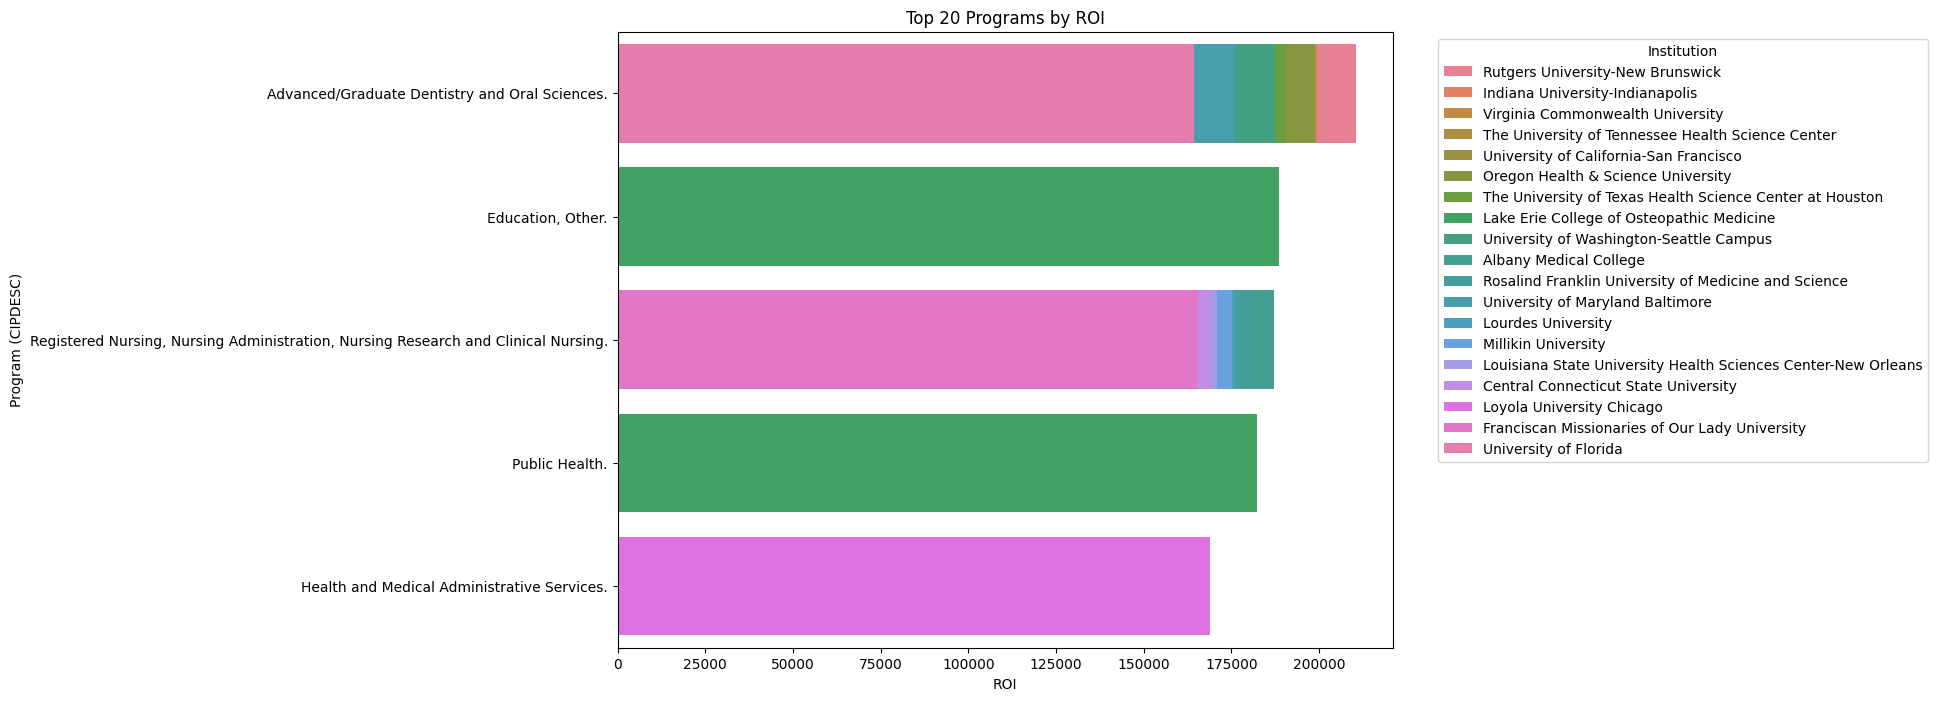

In [93]:
top20 = df_merged_clean.sort_values("ROI", ascending=False).head(20)

plt.figure(figsize=(10,8))
sns.barplot(
    data=top20,
    y="CIPDESC",
    x="ROI",
    hue="INSTNM",
    dodge=False
)
plt.title("Top 20 Programs by ROI")
plt.xlabel("ROI")
plt.ylabel("Program (CIPDESC)")
plt.legend(title="Institution", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


Our graph presents the same informaiton got from runing a query but in a more presentable way, we can see that health related studies have a better ROI in general as they dominate in the top 5

Lets look into the distribution of ROI for each degree type

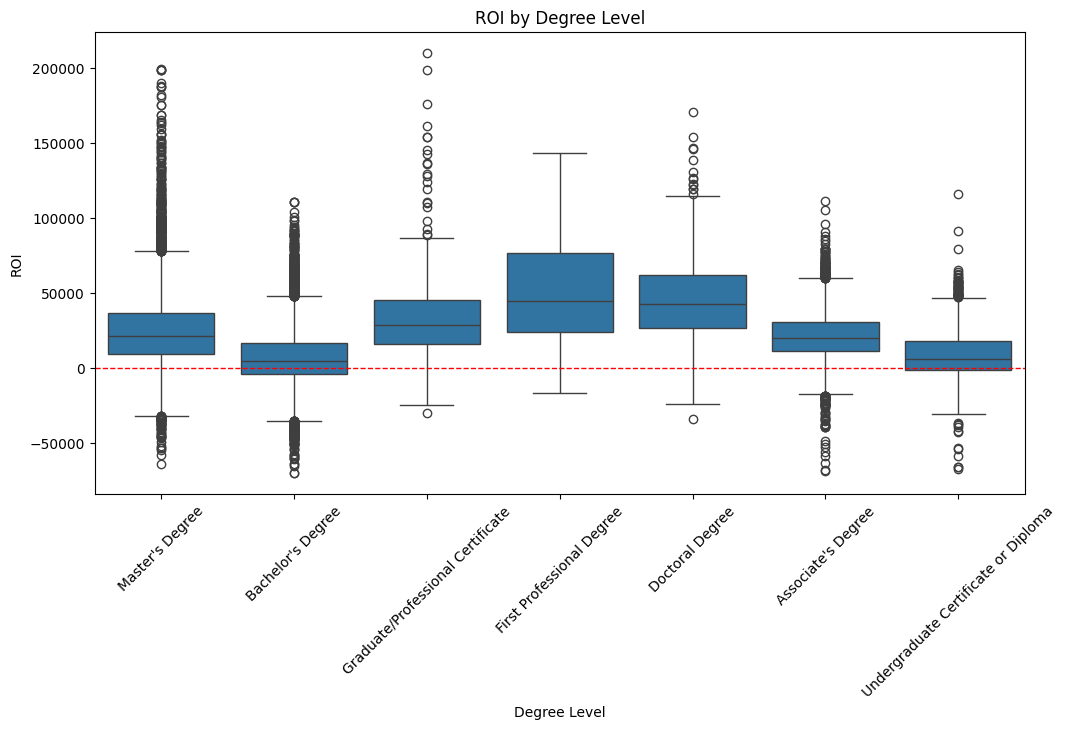

In [94]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_merged_clean,
    x="CREDDESC",
    y="ROI"
)
plt.title("ROI by Degree Level")
plt.xlabel("Degree Level")
plt.ylabel("ROI")
plt.xticks(rotation=45)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.show()


From the above graph we are seeing that degrees other than Bachelors and Undergrad certificate or diploma overall are better as the lower quartile never touches the ROI=0 line, but we do have a lot of outliers in all cases. But in general we can say that the prospects are much better after completing a masters program

Lets see how the ROI ranges based on the control(Publoc/provate non profit/private profit) looks like

In [95]:
control_map = {1: "Public", 2: "Private Nonprofit", 3: "For-profit"}
df_plot = df_merged_clean.copy()
df_plot["CONTROL_TYPE"] = df_plot["CONTROL"].map(control_map)

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_plot,
    x="CONTROL_TYPE",
    y="ROI"
)
plt.title("ROI by Institutional Control Type")
plt.xlabel("Institution Control")
plt.ylabel("ROI")
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.show()


From the graph we can clearly see that Public universities have a better ROI in general as they have very few < 0 points. But this could not be the only factor

Lets visialize compluter related programs and which one has a better ROI overall

In [96]:
df_comp = df_merged_clean[
    df_merged_clean["CIPDESC"].str.lower().str.contains(
        "computer|software|information|informatics|cyber|data",
        na=False
    )
]

top_comp = df_comp.sort_values("ROI", ascending=False).head(20)

plt.figure(figsize=(10,8))
sns.barplot(
    data=top_comp,
    y="CIPDESC",
    x="ROI"
)
plt.title("Top 20 Highest ROI Computer-Related Programs")
plt.xlabel("ROI")
plt.ylabel("Computer-like Program")
plt.show()

Lets see the correlation between our features

In [97]:
numeric_df = df_merged_clean.select_dtypes(include=["float64","int64"])
numeric_df.shape

(50228, 18)

In [98]:
corr_matrix = numeric_df.corr()
corr_matrix

UNITID   CONTROL  IPEDSCOUNT1  IPEDSCOUNT2  \
UNITID                  1.000000  0.369628    -0.013459    -0.002843   
CONTROL                 0.369628  1.000000    -0.037444    -0.027115   
IPEDSCOUNT1            -0.013459 -0.037444     1.000000     0.977371   
IPEDSCOUNT2            -0.002843 -0.027115     0.977371     1.000000   
MAIN                   -0.540281 -0.309730     0.067429     0.060995   
EARN_COUNT_NWNE_1YR     0.254648  0.251720     0.370069     0.370720   
EARN_COUNT_NWNE_HI_1YR  0.249313  0.249706     0.312069     0.309919   
EARN_COUNT_NWNE_5YR     0.254500  0.256132     0.285793     0.284701   
EARN_COUNT_NWNE_4YR     0.251727  0.252768     0.283080     0.282323   
BBRR1_FED_COMP_N        0.238023  0.236198     0.371738     0.369812   
DEBT_ALL_STGP_EVAL_N    0.198814  0.187527     0.365889     0.363933   
BBRR2_FED_COMP_N        0.235008  0.229163     0.318515     0.314339   
BBRR4_FED_COMP_N        0.228734  0.225949     0.278073     0.273868   
BBRR3_FED_COMP_N        0.228623  0.225817     0.278100     0.273893   
EARN_CNTOVER150_HI_2YR  0.199080  0.188029     0.294661     0.287326   
EARN_COUNT_WNE_HI_2YR   0.223927  0.217124     0.294427     0.288452   
EARN_COUNT_NWNE_HI_2YR  0.245259  0.250682     0.239101     0.237105   
ROI                     0.056896 -0.202601     0.080017     0.076130   

                            MAIN  EARN_COUNT_NWNE_1YR  EARN_COUNT_NWNE_HI_1YR  \
UNITID                 -0.540281             0.254648                0.249313   
CONTROL                -0.309730             0.251720                0.249706   
IPEDSCOUNT1             0.067429             0.370069                0.312069   
IPEDSCOUNT2             0.060995             0.370720                0.309919   
MAIN                    1.000000            -0.285889               -0.280224   
EARN_COUNT_NWNE_1YR    -0.285889             1.000000                0.929838   
EARN_COUNT_NWNE_HI_1YR -0.280224             0.929838                1.000000   
EARN_COUNT_NWNE_5YR    -0.284682             0.786437                0.855197   
EARN_COUNT_NWNE_4YR    -0.280008             0.791576                0.864752   
BBRR1_FED_COMP_N       -0.303263             0.783760                0.766667   
DEBT_ALL_STGP_EVAL_N   -0.252593             0.685692                0.617879   
BBRR2_FED_COMP_N       -0.291520             0.717055                0.735088   
BBRR4_FED_COMP_N       -0.280537             0.670667                0.706157   
BBRR3_FED_COMP_N       -0.280407             0.670596                0.706109   
EARN_CNTOVER150_HI_2YR -0.233524             0.612706                0.633071   
EARN_COUNT_WNE_HI_2YR  -0.262994             0.673961                0.703893   
EARN_COUNT_NWNE_HI_2YR -0.267911             0.811864                0.898803   
ROI                    -0.056101            -0.025764               -0.028942   

                        EARN_COUNT_NWNE_5YR  EARN_COUNT_NWNE_4YR  \
UNITID                             0.254500             0.251727   
CONTROL                            0.256132             0.252768   
IPEDSCOUNT1                        0.285793             0.283080   
IPEDSCOUNT2                        0.284701             0.282323   
MAIN                              -0.284682            -0.280008   
EARN_COUNT_NWNE_1YR                0.786437             0.791576   
EARN_COUNT_NWNE_HI_1YR             0.855197             0.864752   
EARN_COUNT_NWNE_5YR                1.000000             0.992538   
EARN_COUNT_NWNE_4YR                0.992538             1.000000   
BBRR1_FED_COMP_N                   0.761400             0.757712   
DEBT_ALL_STGP_EVAL_N               0.630707             0.622928   
BBRR2_FED_COMP_N                   0.826152             0.819331   
BBRR4_FED_COMP_N                   0.846241             0.839305   
BBRR3_FED_COMP_N                   0.846179             0.839257   
EARN_CNTOVER150_HI_2YR             0.779716             0.773200   
EARN_COUNT_WNE_HI_2YR        

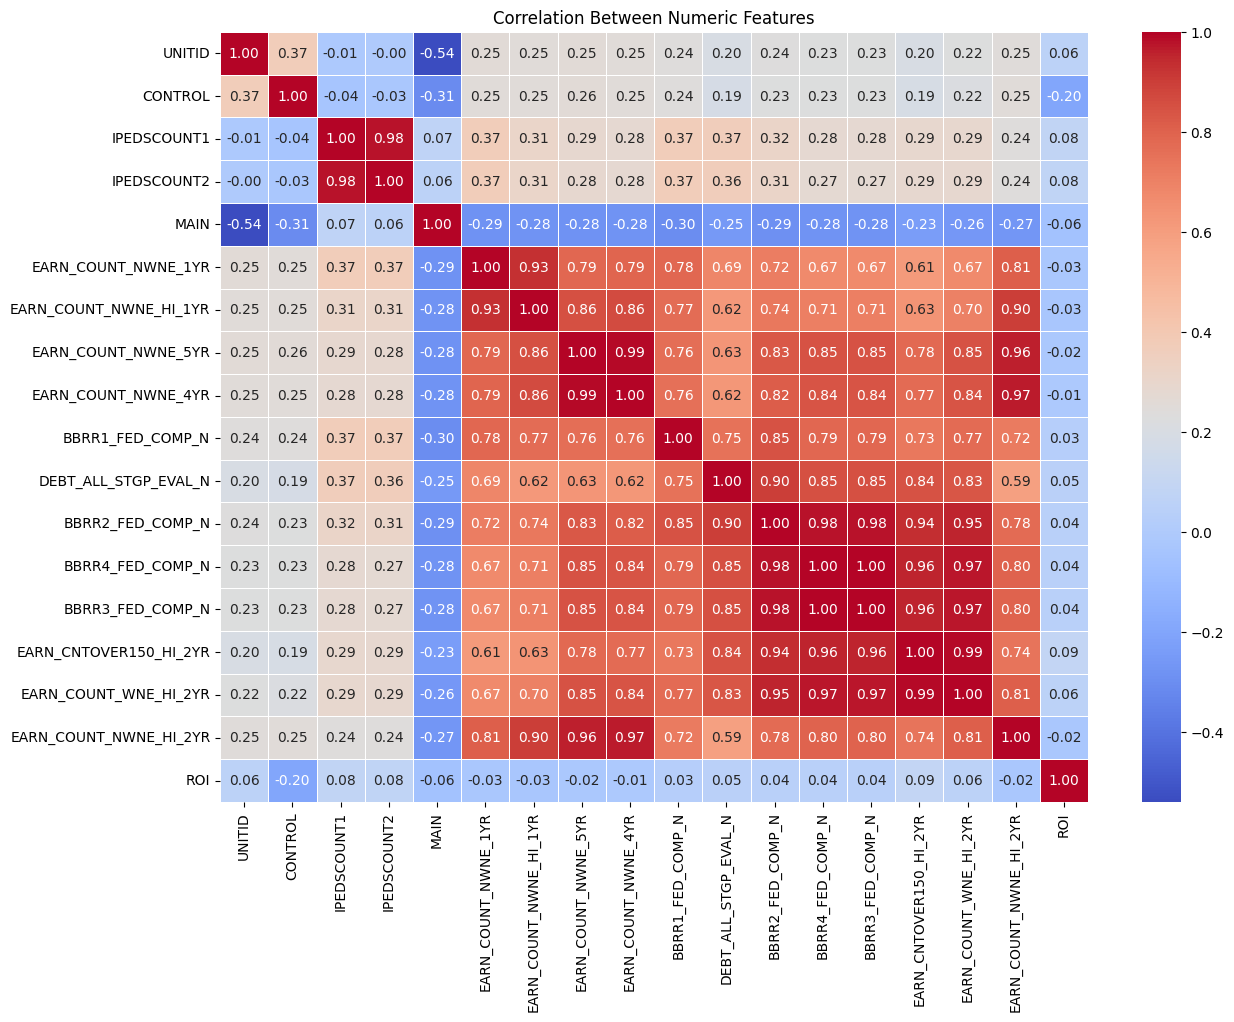

In [99]:
plt.figure(figsize=(14,10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Between Numeric Features")
plt.show()


We can see that a lot of columns are highly coprrelated, and its pratically impossible to pick out the most important ones, so lets run a few algorithms to calibrate the importance of the fetaures

Lets check the importance of the fetaures using three methods
1. Random Forest Importance: Measures how much each feature decreases impurity (Gini/MSE) across many randomized trees, showing which features the model relies on the most.
2. XGBoost Importance: Measures how often and how effectively each feature is used to reduce error across boosted decision trees, capturing strong non-linear and interaction effects.
3. PCA: PCA reduces your features into a smaller number of components that capture the maximum variance in the data.

Data preparation for feature importance

In [100]:
df_merged_clean.columns.tolist()

['UNITID',
 'INSTNM',
 'CONTROL',
 'IPEDSCOUNT1',
 'CIPDESC',
 'IPEDSCOUNT2',
 'CREDDESC',
 'MAIN',
 'EARN_COUNT_NWNE_1YR',
 'EARN_COUNT_NWNE_HI_1YR',
 'EARN_COUNT_NWNE_5YR',
 'EARN_COUNT_NWNE_4YR',
 'BBRR1_FED_COMP_N',
 'DEBT_ALL_STGP_EVAL_N',
 'BBRR2_FED_COMP_N',
 'BBRR4_FED_COMP_N',
 'BBRR3_FED_COMP_N',
 'EARN_CNTOVER150_HI_2YR',
 'EARN_COUNT_WNE_HI_2YR',
 'EARN_COUNT_NWNE_HI_2YR',
 'ROI']

In [101]:
numeric_cols = df_merged_clean.select_dtypes(include=["float64","int64"]).columns.tolist()
numeric_cols

['UNITID',
 'CONTROL',
 'IPEDSCOUNT1',
 'IPEDSCOUNT2',
 'MAIN',
 'EARN_COUNT_NWNE_1YR',
 'EARN_COUNT_NWNE_HI_1YR',
 'EARN_COUNT_NWNE_5YR',
 'EARN_COUNT_NWNE_4YR',
 'BBRR1_FED_COMP_N',
 'DEBT_ALL_STGP_EVAL_N',
 'BBRR2_FED_COMP_N',
 'BBRR4_FED_COMP_N',
 'BBRR3_FED_COMP_N',
 'EARN_CNTOVER150_HI_2YR',
 'EARN_COUNT_WNE_HI_2YR',
 'EARN_COUNT_NWNE_HI_2YR',
 'ROI']

In [102]:
numeric_cols.remove("ROI")
numeric_cols

['UNITID',
 'CONTROL',
 'IPEDSCOUNT1',
 'IPEDSCOUNT2',
 'MAIN',
 'EARN_COUNT_NWNE_1YR',
 'EARN_COUNT_NWNE_HI_1YR',
 'EARN_COUNT_NWNE_5YR',
 'EARN_COUNT_NWNE_4YR',
 'BBRR1_FED_COMP_N',
 'DEBT_ALL_STGP_EVAL_N',
 'BBRR2_FED_COMP_N',
 'BBRR4_FED_COMP_N',
 'BBRR3_FED_COMP_N',
 'EARN_CNTOVER150_HI_2YR',
 'EARN_COUNT_WNE_HI_2YR',
 'EARN_COUNT_NWNE_HI_2YR']

In [103]:
len(df_merged_clean.columns.tolist())

21

In [104]:
len(numeric_cols)

17

The only columns missing are INSTNM, CIPDESC and CREDDESC, which absically are the institute name, the program name and the degree name, for now we'll run the algorithm for the numeric solumns alone

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [106]:
# numeric_cols

X = df_merged_clean.drop(['INSTNM', 'CIPDESC', 'CREDDESC', 'ROI'], axis=True)
y = df_merged_clean["ROI"]

In [107]:
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Random Forest

In [108]:
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    max_depth=None,
    n_jobs=-1
)

rf.fit(X_train_feat, y_train_feat)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [109]:
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    "feature": numeric_cols,
    "importance": importances
}).sort_values("importance", ascending=False)

feature_importance_df


feature  importance
14  EARN_CNTOVER150_HI_2YR    0.206195
15   EARN_COUNT_WNE_HI_2YR    0.100448
0                   UNITID    0.099808
1                  CONTROL    0.069555
2              IPEDSCOUNT1    0.062491
3              IPEDSCOUNT2    0.058819
12        BBRR4_FED_COMP_N    0.052454
13        BBRR3_FED_COMP_N    0.050533
11        BBRR2_FED_COMP_N    0.048442
9         BBRR1_FED_COMP_N    0.045724
7      EARN_COUNT_NWNE_5YR    0.044805
10    DEBT_ALL_STGP_EVAL_N    0.040772
16  EARN_COUNT_NWNE_HI_2YR    0.035746
5      EARN_COUNT_NWNE_1YR    0.027183
8      EARN_COUNT_NWNE_4YR    0.026354
6   EARN_COUNT_NWNE_HI_1YR    0.025869
4                     MAIN    0.004801

/tmp/ipython-input-1272217300.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


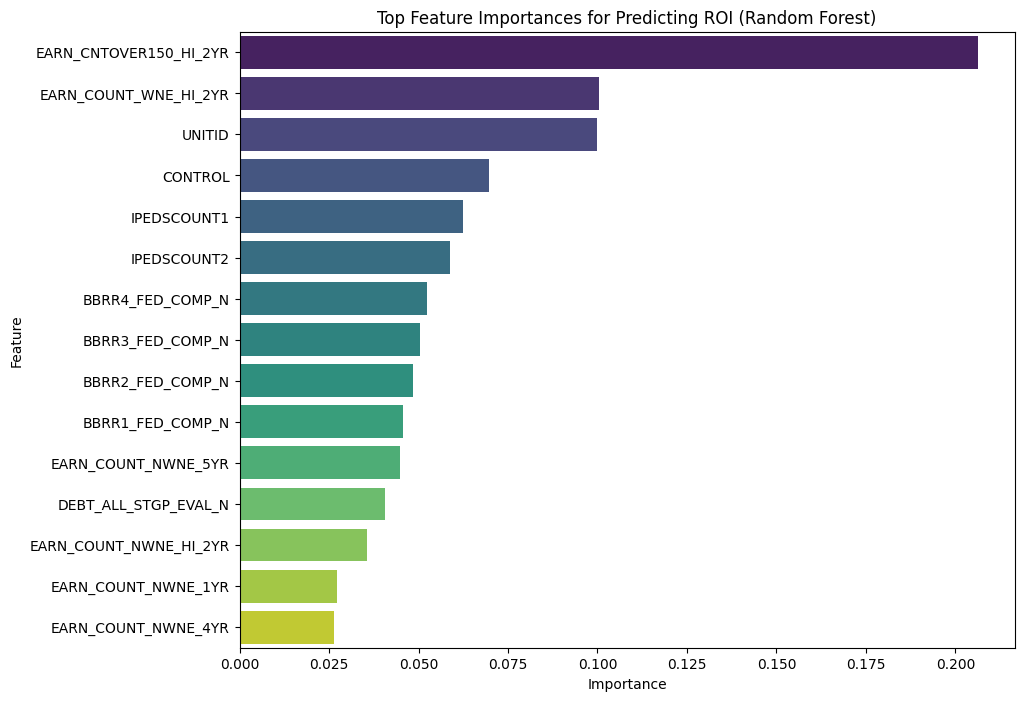

In [110]:
plt.figure(figsize=(10,8))
sns.barplot(
    data=feature_importance_df.head(15),
    x="importance",
    y="feature",
    palette="viridis"
)
plt.title("Top Feature Importances for Predicting ROI (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

XGBoost

In [111]:
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05)
xgb.fit(X, y)

xgb_importance = pd.Series(xgb.feature_importances_, index=X.columns)\
                    .sort_values(ascending=False)
xgb_importance_df = (
    xgb_importance
    .reset_index()
    .rename(columns={"index": "feature", 0: "importance"})
)

xgb_importance_df = xgb_importance_df.sort_values("importance", ascending=False)
xgb_importance_df

feature  importance
0                  CONTROL    0.184115
1         BBRR3_FED_COMP_N    0.145384
2   EARN_CNTOVER150_HI_2YR    0.123053
3    EARN_COUNT_WNE_HI_2YR    0.070167
4   EARN_COUNT_NWNE_HI_2YR    0.065703
5         BBRR4_FED_COMP_N    0.065260
6      EARN_COUNT_NWNE_5YR    0.060110
7                     MAIN    0.039152
8                   UNITID    0.039145
9              IPEDSCOUNT1    0.030017
10  EARN_COUNT_NWNE_HI_1YR    0.028908
11             IPEDSCOUNT2    0.028081
12        BBRR1_FED_COMP_N    0.027477
13     EARN_COUNT_NWNE_1YR    0.026619
14     EARN_COUNT_NWNE_4YR    0.025300
15    DEBT_ALL_STGP_EVAL_N    0.021328
16        BBRR2_FED_COMP_N    0.020182

In [112]:
plt.figure(figsize=(10,8))
sns.barplot(
    data=xgb_importance_df,
    x="importance",
    y="feature",
    palette="viridis"
)
plt.title("Top Feature Importances for Predicting ROI (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

/tmp/ipython-input-4194587970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


PCA

In [115]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [118]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

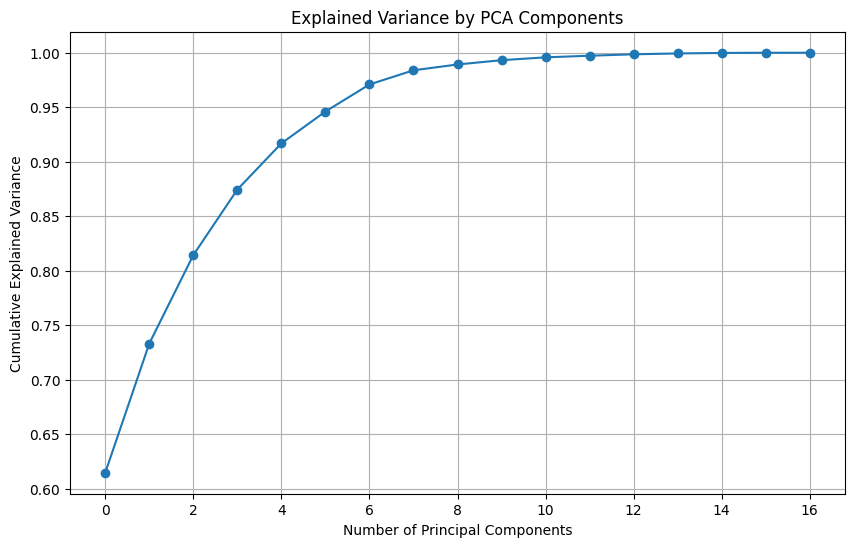

In [119]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid()
plt.show()

In [120]:
loadings = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=[f"PC{i+1}" for i in range(len(X.columns))]
)

loadings.head()


UNITID   CONTROL  IPEDSCOUNT1  IPEDSCOUNT2      MAIN  \
PC1  0.092477  0.088387     0.120163     0.119447 -0.104537   
PC2 -0.354427 -0.310870     0.556612     0.552025  0.383060   
PC3  0.495767  0.357959     0.375539     0.387289 -0.389525   
PC4 -0.196510 -0.032019    -0.089002    -0.088459  0.208087   
PC5 -0.227854  0.862735     0.014666     0.019170  0.434205   

     EARN_COUNT_NWNE_1YR  EARN_COUNT_NWNE_HI_1YR  EARN_COUNT_NWNE_5YR  \
PC1             0.259708                0.266224             0.286365   
PC2             0.024781               -0.016598            -0.045812   
PC3             0.152466                0.092874            -0.032515   
PC4             0.330162                0.412293             0.266329   
PC5            -0.058926               -0.062703            -0.019259   

     EARN_COUNT_NWNE_4YR  BBRR1_FED_COMP_N  DEBT_ALL_STGP_EVAL_N  \
PC1             0.285447          0.269452              0.260618   
PC2            -0.045640          0.032512              0.066567   
PC3            -0.031511          0.051608             -0.070581   
PC4             0.285725          0.008825             -0.343950   
PC5            -0.022670         -0.030404              0.020711   

     BBRR2_FED_COMP_N  BBRR4_FED_COMP_N  BBRR3_FED_COMP_N  \
PC1          0.295915          0.293540          0.293529   
PC2         -0.001146         -0.024826         -0.024743   
PC3         -0.124017         -0.169500         -0.169611   
PC4         -0.199807         -0.194034         -0.194098   
PC5          0.016453          0.027744          0.027721   

     EARN_CNTOVER150_HI_2YR  EARN_COUNT_WNE_HI_2YR  EARN_COUNT_NWNE_HI_2YR  
PC1                0.280798               0.292630                0.278021  
PC2                0.008248              -0.011415               -0.066866  
PC3               -0.197801              -0.168744               -0.035817  
PC4               -0.273669              -0.178309                0.359771  
PC5                0.039109               0.029590               -0.028260

In [121]:
loadings.loc["PC1"].abs().sort_values(ascending=False).head(10)


BBRR2_FED_COMP_N          0.295915
BBRR4_FED_COMP_N          0.293540
BBRR3_FED_COMP_N          0.293529
EARN_COUNT_WNE_HI_2YR     0.292630
EARN_COUNT_NWNE_5YR       0.286365
EARN_COUNT_NWNE_4YR       0.285447
EARN_CNTOVER150_HI_2YR    0.280798
EARN_COUNT_NWNE_HI_2YR    0.278021
BBRR1_FED_COMP_N          0.269452
EARN_COUNT_NWNE_HI_1YR    0.266224
Name: PC1, dtype: float64

In [126]:
loadings.loc["PC2"].abs().sort_values(ascending=False).head(10)

IPEDSCOUNT1               0.556612
IPEDSCOUNT2               0.552025
MAIN                      0.383060
UNITID                    0.354427
CONTROL                   0.310870
EARN_COUNT_NWNE_HI_2YR    0.066866
DEBT_ALL_STGP_EVAL_N      0.066567
EARN_COUNT_NWNE_5YR       0.045812
EARN_COUNT_NWNE_4YR       0.045640
BBRR1_FED_COMP_N          0.032512
Name: PC2, dtype: float64